# About Dataset

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses. In India, Walmart operates under the name of Flipkart Wholesale. 

The **file** has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemploym

![Image Alt Text](https://www.khmertimeskh.com/wp-content/uploads/2023/01/51193.jpg)

- 1- Store: Store Numbers ranging from 1 to 45
- 2- Date: The Week of Sales. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010
- 3- Weekly_Sales: The sales of the given store in the given week
- 4- Holiday_Flag: If the week has a special Holiday or not. 1-The week has a Holiday 0-Fully working week 
- 5- TemperatureAverage: Temperature of the week of sales
- 6- Fuel_Price: Price of the Fuel in the region of the given store
- 7- Unemployment: Unemployment **rate** of the given store region
- 8- CPI: Customer Price Index , the instrument to measure inflation. It is used to estimate the average variation between two given periods in the prices of products consumed by households. It is a composite measurement of trends in the prices of products, at constant quality.

![My Local Image](https://cdn.educba.com/academy/wp-content/uploads/2019/07/Consumer-Price-Index-Formula.jpg)

In [125]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import klib
from pandas_profiling import ProfileReport

In [127]:
df = pd.read_csv("../input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv" , sep = "," ,encoding = "utf-8")
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [128]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

## Data Discovery

In [129]:
df.shape

(6435, 8)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [131]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

- Converting Date to datetime

In [132]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

- Null Values Discovery

In [133]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

- Duplicate Values Discovery

In [134]:
df.duplicated().sum()

0

- Outliers Discovery

Store              Axes(0.125,0.712609;0.168478x0.167391)
Weekly_Sales    Axes(0.327174,0.712609;0.168478x0.167391)
Holiday_Flag    Axes(0.529348,0.712609;0.168478x0.167391)
Temperature     Axes(0.731522,0.712609;0.168478x0.167391)
Fuel_Price         Axes(0.125,0.511739;0.168478x0.167391)
CPI             Axes(0.327174,0.511739;0.168478x0.167391)
Unemployment    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

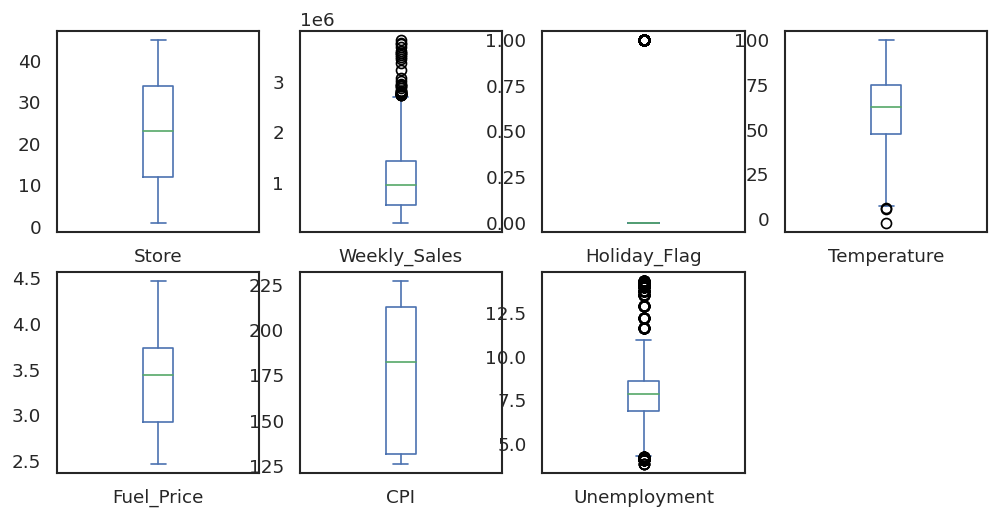

In [135]:
df.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

## Visualization

<Axes: xlabel='Store', ylabel='Density'>

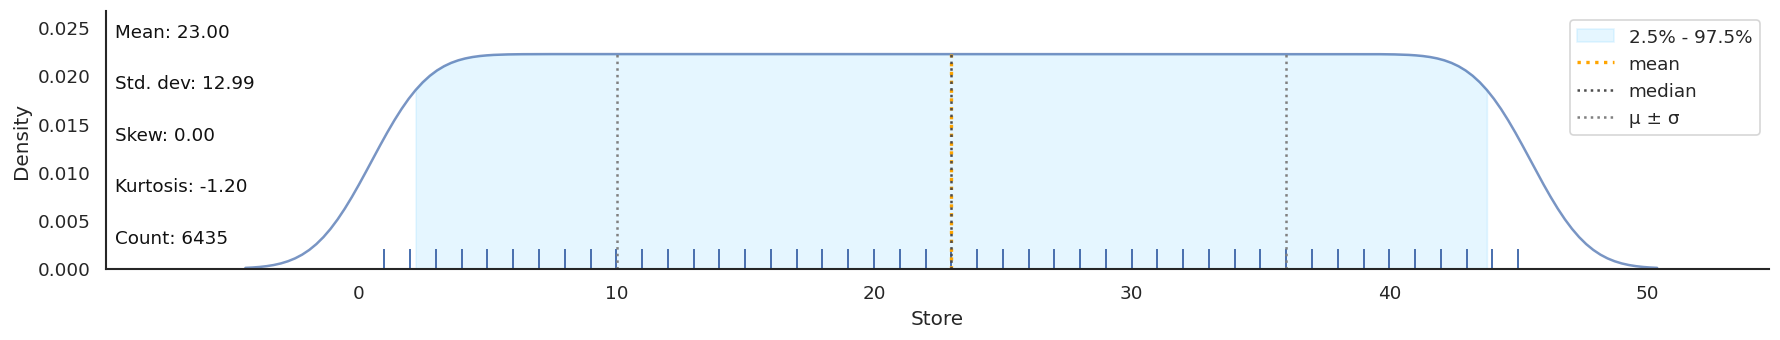

In [136]:
klib.dist_plot(df) 

In [137]:
ProfileReport(df, title= "Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observation:** Sales are more frequent when they are cheap

- Trend Analysis for all 45 stores

*To analyze trends it's crucial to keep in mind the main factors that will possibly affect the behaviour of sales*

**Holiday Events in the Week**

    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
    Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12


In [138]:
date_sales = df.groupby("Date")[["Weekly_Sales"]].sum().reset_index()
date_sales

Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]

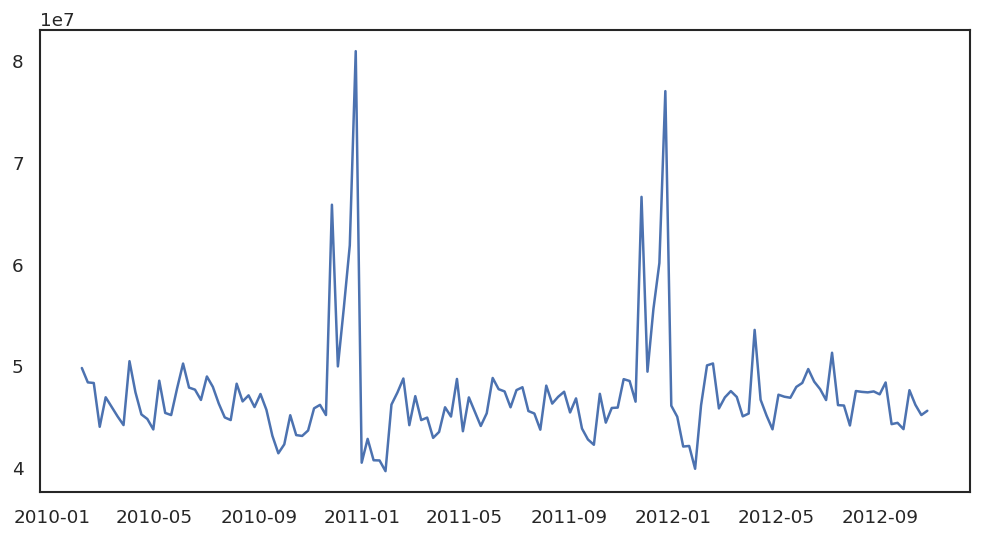

In [139]:
plt.figure(figsize=(10,5))
plt.plot(date_sales['Date'],date_sales['Weekly_Sales'])

**Observation**: Sales is stationary in mean but unstationary in variance. Also, every year around jan , sales show a high increase (seasonal change) due to christmas and thanksgiving.

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>Correlations between other variables and sales over time</font> </h1>

In [140]:
df['Temperature'].unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

In [141]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [142]:
for date, group_df in df.groupby(['Date']):
    print(f"Date: {date}")
    print(group_df[['Date','Temperature']])

Date: (Timestamp('2010-02-05 00:00:00'),)
           Date  Temperature
0    2010-02-05        42.31
143  2010-02-05        40.19
286  2010-02-05        45.71
429  2010-02-05        43.76
572  2010-02-05        39.70
715  2010-02-05        40.43
858  2010-02-05        10.53
1001 2010-02-05        34.14
1144 2010-02-05        38.01
1287 2010-02-05        54.34
1430 2010-02-05        46.04
1573 2010-02-05        49.47
1716 2010-02-05        31.53
1859 2010-02-05        27.31
2002 2010-02-05        19.83
2145 2010-02-05        19.79
2288 2010-02-05        23.11
2431 2010-02-05        21.33
2574 2010-02-05        20.96
2717 2010-02-05        25.92
2860 2010-02-05        39.05
3003 2010-02-05        24.36
3146 2010-02-05        15.25
3289 2010-02-05        22.43
3432 2010-02-05        21.10
3575 2010-02-05         9.55
3718 2010-02-05        27.19
3861 2010-02-05        49.47
4004 2010-02-05        24.36
4147 2010-02-05        39.05
4290 2010-02-05        39.05
4433 2010-02-05        34.43
4

**Assumption**: Since that all of the stores are in the united states, Therefore, there shouldn't be outliers (high changes between the temperature values or fuel prices) so in order to measure the correlation between each of these variables on sales we will use the mean of all 45 stores in each date

In [143]:
temp_mean= df.groupby('Date')['Temperature'].mean().reset_index()
temp_mean

Date  Temperature
0   2010-02-05    34.037333
1   2010-02-12    34.151333
2   2010-02-19    37.719778
3   2010-02-26    39.243556
4   2010-03-05    42.917333
..         ...          ...
138 2012-09-28    68.754444
139 2012-10-05    65.973111
140 2012-10-12    58.342667
141 2012-10-19    60.705333
142 2012-10-26    61.051111

[143 rows x 2 columns]

In [144]:
date_sales= date_sales.reset_index()
date_sales

index       Date  Weekly_Sales
0        0 2010-02-05   49750740.50
1        1 2010-02-12   48336677.63
2        2 2010-02-19   48276993.78
3        3 2010-02-26   43968571.13
4        4 2010-03-05   46871470.30
..     ...        ...           ...
138    138 2012-09-28   43734899.40
139    139 2012-10-05   47566639.31
140    140 2012-10-12   46128514.25
141    141 2012-10-19   45122410.57
142    142 2012-10-26   45544116.29

[143 rows x 3 columns]

In [145]:
date_sales= pd.merge(temp_mean, date_sales, on='Date', how='inner')
date_sales

Date  Temperature  index  Weekly_Sales
0   2010-02-05    34.037333      0   49750740.50
1   2010-02-12    34.151333      1   48336677.63
2   2010-02-19    37.719778      2   48276993.78
3   2010-02-26    39.243556      3   43968571.13
4   2010-03-05    42.917333      4   46871470.30
..         ...          ...    ...           ...
138 2012-09-28    68.754444    138   43734899.40
139 2012-10-05    65.973111    139   47566639.31
140 2012-10-12    58.342667    140   46128514.25
141 2012-10-19    60.705333    141   45122410.57
142 2012-10-26    61.051111    142   45544116.29

[143 rows x 4 columns]

Text(0.5, 1.0, 'Weekly Sales vs. Temperature Over Time')

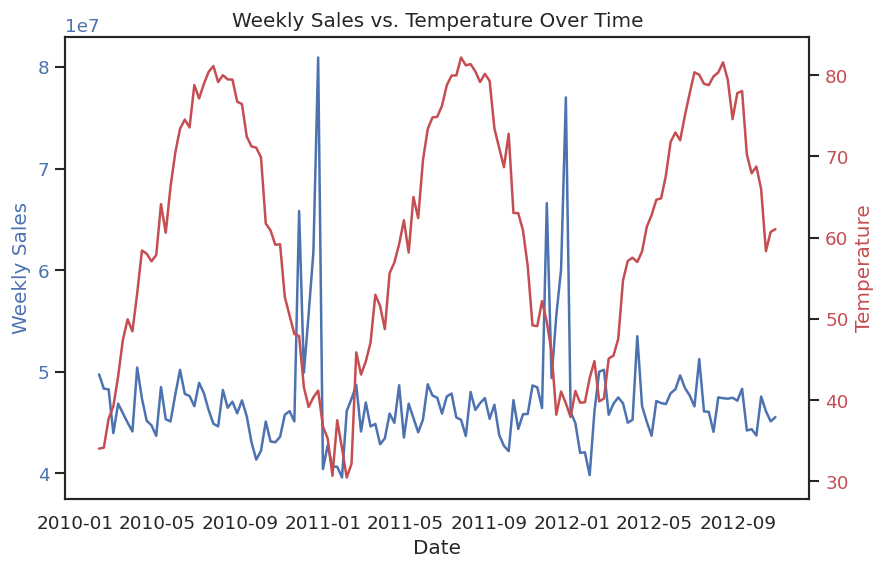

In [146]:


fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Temperature'], color='r', label='Temperature')
ax2.set_ylabel('Temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Temperature Over Time')


**Observation**: As Temperature increase in summer sales are not as high as in winter which indicates that people go out less frequently in summer due to high temperatures

In [147]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [148]:
df[df['Holiday_Flag']==0]['Date'].value_counts()

Date
2010-02-05    45
2011-10-28    45
2012-02-24    45
2012-02-17    45
2012-02-03    45
              ..
2010-11-19    45
2010-11-12    45
2010-11-05    45
2010-10-29    45
2012-10-26    45
Name: count, Length: 133, dtype: int64

In [149]:
df[df['Holiday_Flag']==1]['Date'].value_counts()

Date
2010-02-12    45
2010-09-10    45
2010-11-26    45
2010-12-31    45
2011-02-11    45
2011-09-09    45
2011-11-25    45
2011-12-30    45
2012-02-10    45
2012-09-07    45
Name: count, dtype: int64

**Observation**: Since that holidays are considered to be national holidays so they don't depend on state but they depend on the country therefore for all stores in all states holidays are the same for the same date

In [150]:
holiday_flag= df.groupby('Date')['Holiday_Flag'].mean().reset_index()
holiday_flag

Date  Holiday_Flag
0   2010-02-05           0.0
1   2010-02-12           1.0
2   2010-02-19           0.0
3   2010-02-26           0.0
4   2010-03-05           0.0
..         ...           ...
138 2012-09-28           0.0
139 2012-10-05           0.0
140 2012-10-12           0.0
141 2012-10-19           0.0
142 2012-10-26           0.0

[143 rows x 2 columns]

In [151]:
date_sales= pd.merge(holiday_flag, date_sales, on='Date', how='inner')
date_sales

Date  Holiday_Flag  Temperature  index  Weekly_Sales
0   2010-02-05           0.0    34.037333      0   49750740.50
1   2010-02-12           1.0    34.151333      1   48336677.63
2   2010-02-19           0.0    37.719778      2   48276993.78
3   2010-02-26           0.0    39.243556      3   43968571.13
4   2010-03-05           0.0    42.917333      4   46871470.30
..         ...           ...          ...    ...           ...
138 2012-09-28           0.0    68.754444    138   43734899.40
139 2012-10-05           0.0    65.973111    139   47566639.31
140 2012-10-12           0.0    58.342667    140   46128514.25
141 2012-10-19           0.0    60.705333    141   45122410.57
142 2012-10-26           0.0    61.051111    142   45544116.29

[143 rows x 5 columns]

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

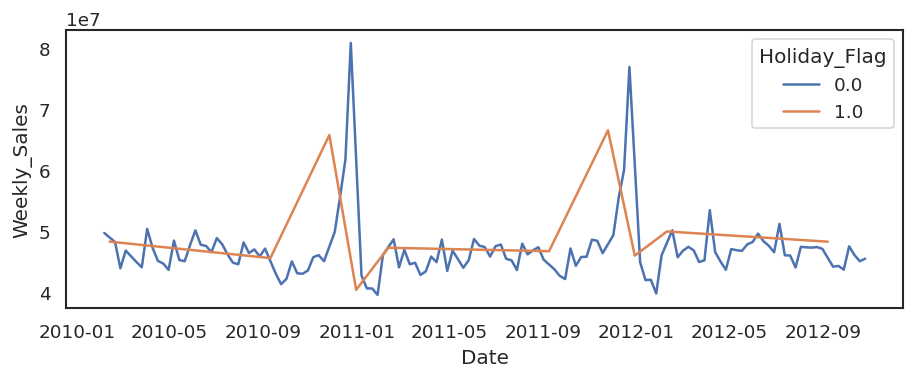

In [152]:
sns.lineplot(x=date_sales['Date'], y=date_sales['Weekly_Sales'], hue=date_sales['Holiday_Flag'])

**Observation**: sales show greater increase (spikes) during holidays.

In [153]:
df.groupby(['Date'])['Fuel_Price'].var().sort_values(ascending=False).reset_index()

Date  Fuel_Price
0   2012-10-12    0.092171
1   2012-10-19    0.087517
2   2012-10-26    0.078129
3   2012-03-02    0.068691
4   2012-02-24    0.065857
..         ...         ...
138 2010-03-26    0.012360
139 2010-06-04    0.012174
140 2010-04-16    0.012087
141 2010-04-09    0.010934
142 2010-04-23    0.009899

[143 rows x 2 columns]

**Observation**: Variance values for each store are very low indicating that all stores have almost the same fuel prices

In [154]:
Fuel_price= df.groupby('Date')['Fuel_Price'].mean().reset_index()
Fuel_price

Date  Fuel_Price
0   2010-02-05    2.717844
1   2010-02-12    2.694022
2   2010-02-19    2.672067
3   2010-02-26    2.683933
4   2010-03-05    2.731200
..         ...         ...
138 2012-09-28    3.854578
139 2012-10-05    3.845222
140 2012-10-12    3.896733
141 2012-10-19    3.880000
142 2012-10-26    3.791489

[143 rows x 2 columns]

In [155]:
date_sales= pd.merge(Fuel_price, date_sales, on='Date', how='inner')
date_sales

Date  Fuel_Price  Holiday_Flag  Temperature  index  Weekly_Sales
0   2010-02-05    2.717844           0.0    34.037333      0   49750740.50
1   2010-02-12    2.694022           1.0    34.151333      1   48336677.63
2   2010-02-19    2.672067           0.0    37.719778      2   48276993.78
3   2010-02-26    2.683933           0.0    39.243556      3   43968571.13
4   2010-03-05    2.731200           0.0    42.917333      4   46871470.30
..         ...         ...           ...          ...    ...           ...
138 2012-09-28    3.854578           0.0    68.754444    138   43734899.40
139 2012-10-05    3.845222           0.0    65.973111    139   47566639.31
140 2012-10-12    3.896733           0.0    58.342667    140   46128514.25
141 2012-10-19    3.880000           0.0    60.705333    141   45122410.57
142 2012-10-26    3.791489           0.0    61.051111    142   45544116.29

[143 rows x 6 columns]

Text(0.5, 1.0, 'Weekly Sales vs. Fuel_Price Over Time')

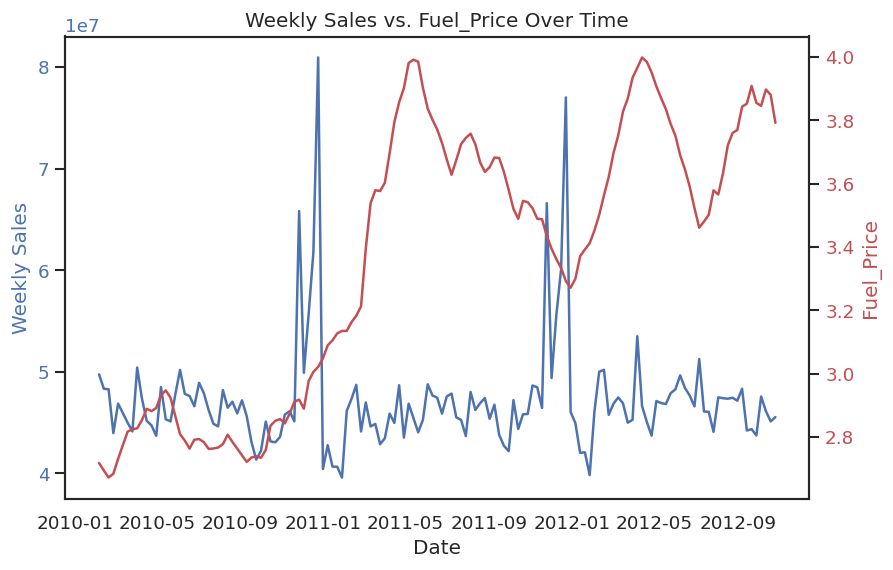

In [156]:

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Fuel_Price'], color='r', label='Fuel_Price')
ax2.set_ylabel('Fuel_Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Fuel_Price Over Time')



**Observation**: Fuel prices seem to increase over time due to inflation but it has nothing to do with sales, i.e: it has no correlation with sales

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>Correlation between features </font> </h1>

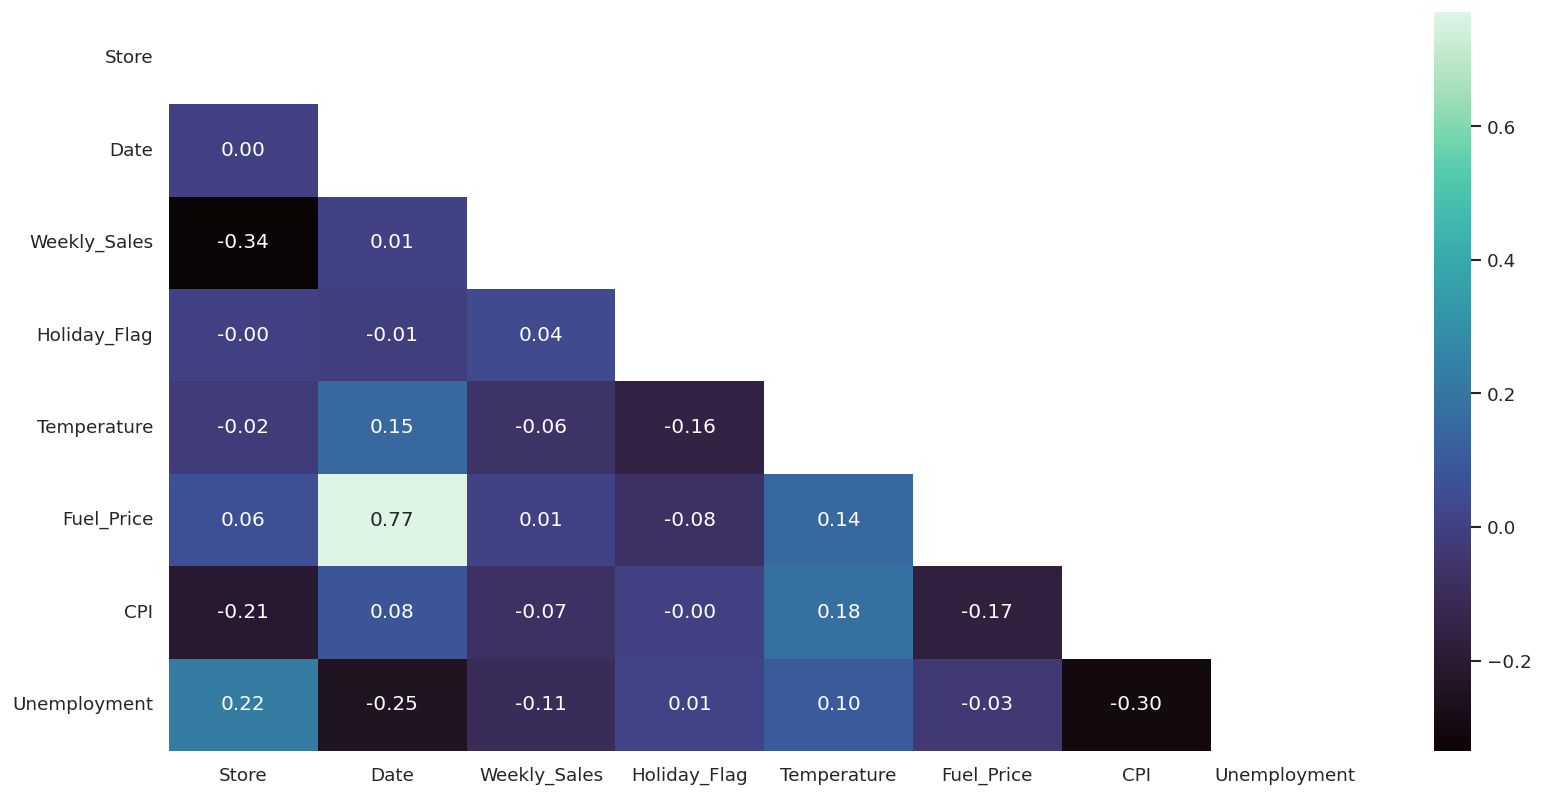

In [157]:
plt.figure(figsize=(16, 8))
sns.set(style="white") 

mask = np.triu(df.corr()) 
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap='mako', mask=mask)

plt.show()

**Observation**: No **direct** correlation between any feature with the other based on pearson correlation values

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>Which store has maximum standard deviation i.e., the sales vary a lot. </font> </h1>

In [158]:
df.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending=False).reset_index()

Store   Weekly_Sales
0      14  317569.949476
1      10  302262.062504
2      20  275900.562742
3       4  266201.442297
4      13  265506.995776
5      23  249788.038068
6      27  239930.135688
7       2  237683.694682
8      39  217466.454833
9       6  212525.855862
10     35  211243.457791
11     19  191722.638730
12     41  187907.162766
13     28  181758.967539
14     18  176641.510839
15     24  167745.677567
16     11  165833.887863
17     22  161251.350631
18      1  155980.767761
19     12  139166.871880
20     32  138017.252087
21     45  130168.526635
22     21  128752.812853
23     31  125855.942933
24     15  120538.652043
25     40  119002.112858
26     25  112976.788600
27      7  112585.469220
28     17  112162.936087
29     26  110431.288141
30      8  106280.829881
31     34  104630.164676
32     29   99120.136596
33     16   85769.680133
34      9   69028.666585
35     36   60725.173579
36     42   50262.925530
37      3   46319.631557
38     38   42768.169450
39     43   40598.413260
40      5   37737.965745
41     44   24762.832015
42     33   24132.927322
43     30   22809.665590
44     37   21837.461190

**Observation**: Store 14 has the highest standard deviation, indicating that its Weekly Sales vary significantly from week to week. While , Store 37 has the lowest standard deviation, suggesting that its Weekly Sales remain relatively stable and consistent.

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

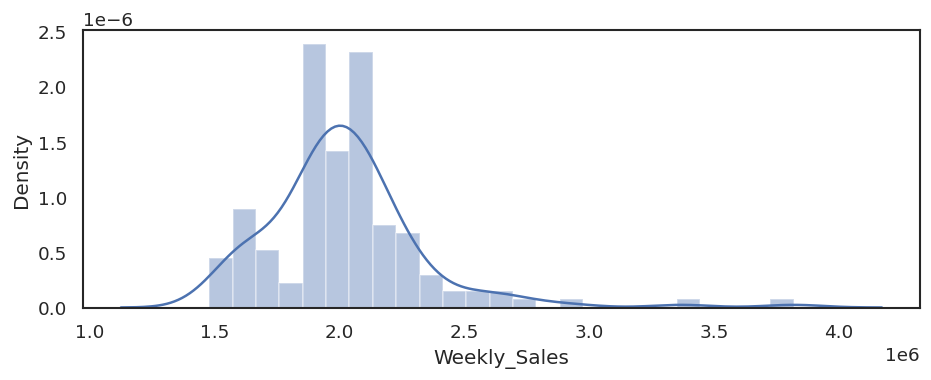

In [159]:
sns.distplot(df[df['Store'] == 14]['Weekly_Sales'])

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

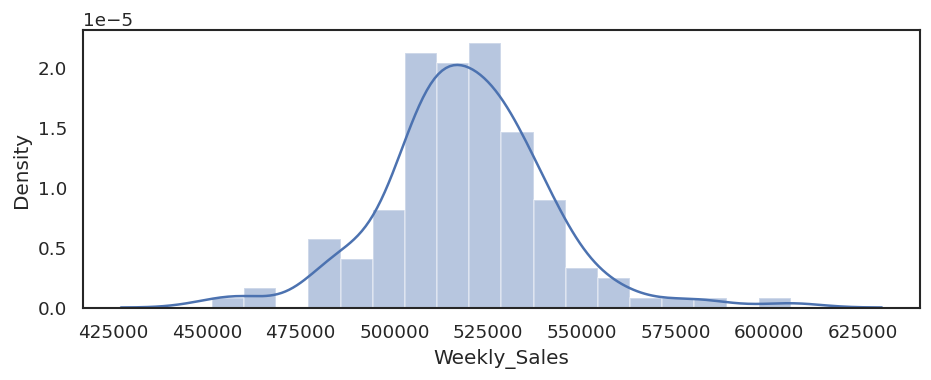

In [160]:
sns.distplot(df[df['Store'] == 37]['Weekly_Sales'])

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>Which holidays have higher sales than the mean sales in non-holiday season for all stores together </font> </h1>

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12


In [161]:
non_holiday_mean_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
non_holiday_mean_sales

1041256.3802088555

In [162]:
super_bowl=df[(df['Date'] == '02-12-2010') | (df['Date'] == '02-12-2011') | (df['Date'] == '02-12-2012')]['Weekly_Sales'].mean()
super_bowl

1074148.3917777783

In [163]:
Labour_day= df[(df['Date'] == '09-10-2010') | (df['Date'] == '09-10-2011') | (df['Date'] == '09-10-2012')]['Weekly_Sales'].mean()
Labour_day

1014097.7297777778

In [164]:
Thanksgiving= df[(df['Date'] == '11-26-2010') | (df['Date'] == '11-26-2011') | (df['Date'] == '11-26-2012')]['Weekly_Sales'].mean()
Thanksgiving

1462688.960888889

In [165]:
Christmas= df[(df['Date'] == '12-31-2010') | (df['Date'] == '12-31-2011') | (df['Date'] == '12-31-2012')]['Weekly_Sales'].mean()
Christmas

898500.4222222222

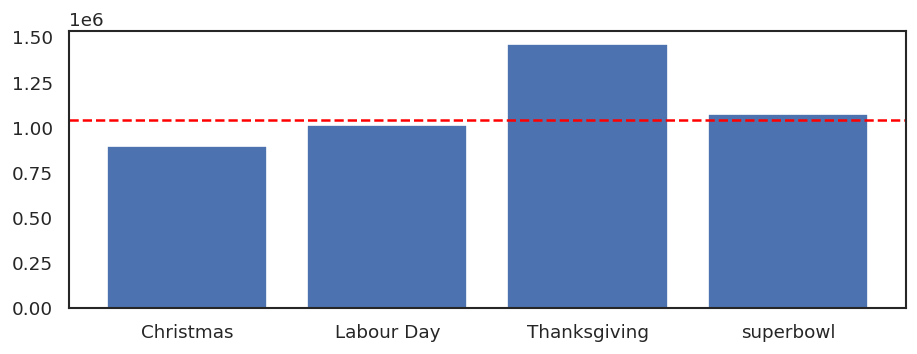

In [166]:
holidays = ['Christmas', 'Labour Day', 'Thanksgiving', 'superbowl']
mean_values = [Christmas,Labour_day,Thanksgiving,super_bowl]  # Replace these with your actual counts

plt.bar(holidays, mean_values)
plt.axhline(non_holiday_mean_sales, color='red', linestyle='--', label='Mean')

**Observation**: Thanksgiving and superbowl have the highest sales over the mean sales in non holidays

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>Sales in different months </font> </h1>

In [167]:
month_sales= df.groupby('Date')[['Weekly_Sales']].sum()
month_sales

Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]

Text(0.5, 1.0, 'Monthly view of sales')

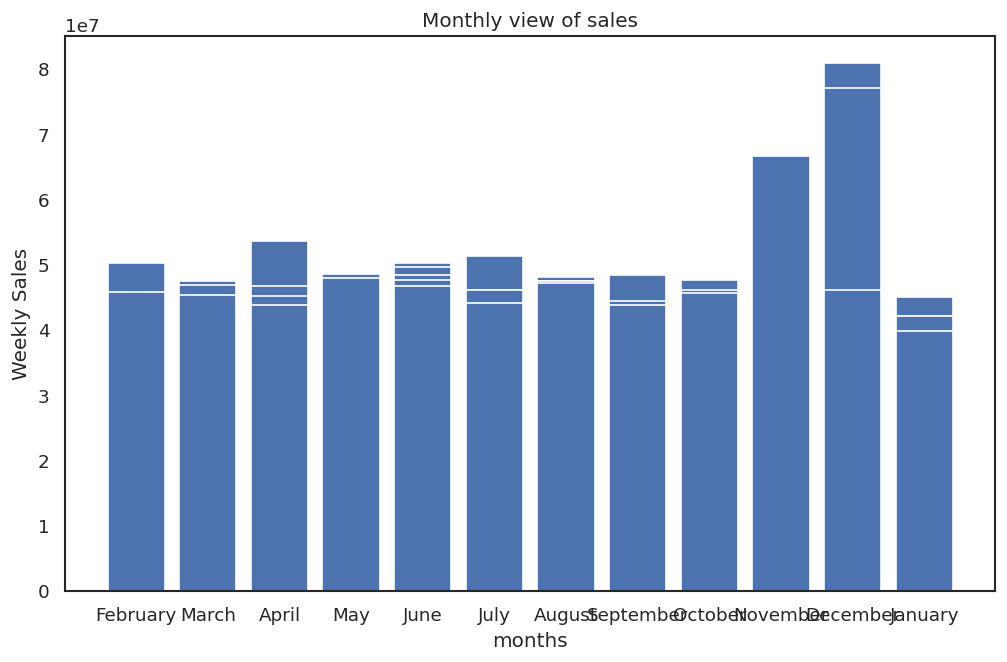

In [168]:
plt.figure(figsize=(10,6))
plt.bar(month_sales.index.month_name(),month_sales["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

**Observation**: December witnesses the highest sales over all months

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>Store-Level Analysis</font> </h1>

- The store with the Highest sales mean:

In [169]:
df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).reset_index()

Store  Weekly_Sales
0      20  2.107677e+06
1       4  2.094713e+06
2      14  2.020978e+06
3      13  2.003620e+06
4       2  1.925751e+06
5      10  1.899425e+06
6      27  1.775216e+06
7       6  1.564728e+06
8       1  1.555264e+06
9      39  1.450668e+06
10     19  1.444999e+06
11     31  1.395901e+06
12     23  1.389864e+06
13     24  1.356755e+06
14     11  1.356383e+06
15     28  1.323522e+06
16     41  1.268125e+06
17     32  1.166568e+06
18     18  1.084718e+06
19     22  1.028501e+06
20     12  1.009002e+06
21     26  1.002912e+06
22     34  9.667816e+05
23     40  9.641280e+05
24     35  9.197250e+05
25      8  9.087495e+05
26     17  8.935814e+05
27     45  7.859814e+05
28     21  7.560691e+05
29     25  7.067215e+05
30     43  6.333247e+05
31     15  6.233125e+05
32      7  5.706173e+05
33     42  5.564039e+05
34      9  5.439806e+05
35     29  5.394514e+05
36     16  5.192477e+05
37     37  5.189003e+05
38     30  4.385796e+05
39      3  4.027044e+05
40     38  3.857317e+05
41     36  3.735120e+05
42      5  3.180118e+05
43     44  3.027489e+05
44     33  2.598617e+05

**Observation**: store 20 has the highest mean of sales

- The store with the Highest sum of sales:

In [170]:
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending= False).reset_index()

Store  Weekly_Sales
0      20  3.013978e+08
1       4  2.995440e+08
2      14  2.889999e+08
3      13  2.865177e+08
4       2  2.753824e+08
5      10  2.716177e+08
6      27  2.538559e+08
7       6  2.237561e+08
8       1  2.224028e+08
9      39  2.074455e+08
10     19  2.066349e+08
11     31  1.996139e+08
12     23  1.987506e+08
13     24  1.940160e+08
14     11  1.939628e+08
15     28  1.892637e+08
16     41  1.813419e+08
17     32  1.668192e+08
18     18  1.551147e+08
19     22  1.470756e+08
20     12  1.442872e+08
21     26  1.434164e+08
22     34  1.382498e+08
23     40  1.378703e+08
24     35  1.315207e+08
25      8  1.299512e+08
26     17  1.277821e+08
27     45  1.123953e+08
28     21  1.081179e+08
29     25  1.010612e+08
30     43  9.056544e+07
31     15  8.913368e+07
32      7  8.159828e+07
33     42  7.956575e+07
34      9  7.778922e+07
35     29  7.714155e+07
36     16  7.425243e+07
37     37  7.420274e+07
38     30  6.271689e+07
39      3  5.758674e+07
40     38  5.515963e+07
41     36  5.341221e+07
42      5  4.547569e+07
43     44  4.329309e+07
44     33  3.716022e+07

**Observation**: store 20 has the highest sum of sales

- The store with the Highest max of sales:

In [171]:
df.groupby('Store')['Weekly_Sales'].max().sort_values(ascending= False).reset_index()

Store  Weekly_Sales
0      14    3818686.45
1      20    3766687.43
2      10    3749057.69
3       4    3676388.98
4      13    3595903.20
5       2    3436007.68
6      27    3078162.08
7      23    2734277.10
8       6    2727575.18
9      19    2678206.42
10     39    2554482.84
11      1    2387950.20
12     24    2386015.75
13     11    2306265.36
14     41    2263722.68
15     31    2068942.97
16     18    2027507.15
17     28    2026026.39
18     22    1962445.04
19     32    1959526.96
20     35    1781866.98
21     12    1768249.89
22     45    1682862.03
23     40    1648829.18
24     34    1620748.25
25     21    1587257.78
26     26    1573982.47
27      8    1511641.09
28     15    1368318.17
29     17    1309226.79
30     25    1295391.19
31     29    1130926.79
32      7    1059715.27
33     16    1004730.69
34      9     905324.68
35     43     725043.04
36     42     674919.45
37      3     605990.41
38     37     605791.46
39     30     519354.88
40      5     507900.07
41     38     499267.66
42     36     489372.02
43     44     376233.89
44     33     331173.51

**Observation**: store 14 has the highest max of sales

In [172]:
df[df['Store']==1].describe()['Weekly_Sales'].reset_index()

index  Weekly_Sales
0  count  1.430000e+02
1   mean  1.555264e+06
2    min  1.316899e+06
3    25%  1.458105e+06
4    50%  1.534850e+06
5    75%  1.614892e+06
6    max  2.387950e+06
7    std  1.559808e+05

In [173]:
df[df['Store']==20].describe()['Weekly_Sales'].reset_index()

index  Weekly_Sales
0  count  1.430000e+02
1   mean  2.107677e+06
2    min  1.761017e+06
3    25%  1.950866e+06
4    50%  2.053165e+06
5    75%  2.155186e+06
6    max  3.766687e+06
7    std  2.759006e+05

**Observation**: store number 20 is the best performing store. Therefore, we will plot it to see its behaviour against time.

In [174]:
store_sales_20= df[df['Store']==20][['Date','Weekly_Sales']].reset_index()
store_sales_20

index       Date  Weekly_Sales
0     2717 2010-02-05    2401395.47
1     2718 2010-02-12    2109107.90
2     2719 2010-02-19    2161549.76
3     2720 2010-02-26    1898193.95
4     2721 2010-03-05    2119213.72
..     ...        ...           ...
138   2855 2012-09-28    2008350.58
139   2856 2012-10-05    2246411.89
140   2857 2012-10-12    2162951.36
141   2858 2012-10-19    1999363.49
142   2859 2012-10-26    2031650.55

[143 rows x 3 columns]

In [175]:
store_sales_not20= df[df['Store']!=20][['Date','Weekly_Sales']]
store_sales_not20=store_sales_not20.groupby('Date')['Weekly_Sales'].mean().reset_index()
store_sales_not20

Date  Weekly_Sales
0   2010-02-05  1.076121e+06
1   2010-02-12  1.050627e+06
2   2010-02-19  1.048078e+06
3   2010-02-26  9.561449e+05
4   2010-03-05  1.017097e+06
..         ...           ...
138 2012-09-28  9.483307e+05
139 2012-10-05  1.030005e+06
140 2012-10-12  9.992173e+05
141 2012-10-19  9.800693e+05
142 2012-10-26  9.889197e+05

[143 rows x 2 columns]

- Store 20 against all stores

Text(0.5, 1.0, 'Weekly Sales vs. store 20 Over Time')

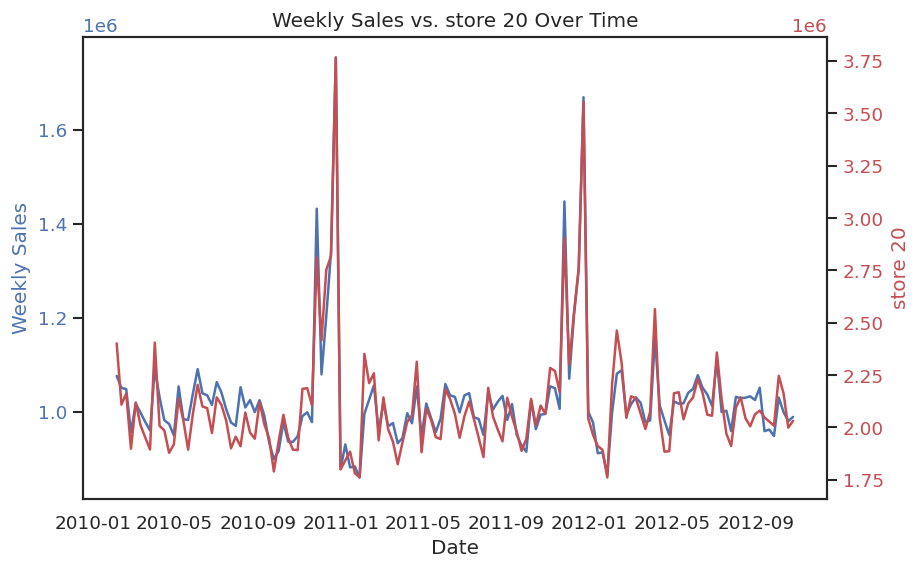

In [176]:

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(store_sales_not20['Date'], store_sales_not20['Weekly_Sales'], color='b', label='all stores Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(store_sales_20['Date'], store_sales_20['Weekly_Sales'], color='r', label='store 20')
ax2.set_ylabel('store 20', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. store 20 Over Time')


**Observation**: it is obvious that store 20 has higher peaks in sales than the rest of stores which means that it is the top performing store

<h1 align="left" style="color:Blue; "> <b> <font  color='blue'>How do Consumer Price Index (CPI) and unemployment rate correlate with sales?</font> </h1>

**What is CPI?**:
The Consumer Price Index (CPI) is a measure that examines the average change in prices paid by consumers for a basket of goods and services over time. It is one of the most widely used indicators for inflation.

In [177]:
df.groupby('Date')['CPI'].std()

Date
2010-02-05    38.692144
2010-02-12    38.732430
2010-02-19    38.737027
2010-02-26    38.735680
2010-03-05    38.734337
                ...    
2012-09-28    41.517399
2012-10-05    41.588349
2012-10-12    41.659314
2012-10-19    41.688018
2012-10-26    41.709751
Name: CPI, Length: 143, dtype: float64

In [178]:
CPI= df.groupby('Date')['CPI'].mean().reset_index()
CPI

Date         CPI
0   2010-02-05  167.730885
1   2010-02-12  167.825608
2   2010-02-19  167.871686
3   2010-02-26  167.909657
4   2010-03-05  167.947628
..         ...         ...
138 2012-09-28  176.373588
139 2012-10-05  176.505052
140 2012-10-12  176.636515
141 2012-10-19  176.652613
142 2012-10-26  176.649482

[143 rows x 2 columns]

In [179]:
date_sales= pd.merge(CPI, date_sales, on='Date', how='inner')
date_sales

Date         CPI  Fuel_Price  Holiday_Flag  Temperature  index  \
0   2010-02-05  167.730885    2.717844           0.0    34.037333      0   
1   2010-02-12  167.825608    2.694022           1.0    34.151333      1   
2   2010-02-19  167.871686    2.672067           0.0    37.719778      2   
3   2010-02-26  167.909657    2.683933           0.0    39.243556      3   
4   2010-03-05  167.947628    2.731200           0.0    42.917333      4   
..         ...         ...         ...           ...          ...    ...   
138 2012-09-28  176.373588    3.854578           0.0    68.754444    138   
139 2012-10-05  176.505052    3.845222           0.0    65.973111    139   
140 2012-10-12  176.636515    3.896733           0.0    58.342667    140   
141 2012-10-19  176.652613    3.880000           0.0    60.705333    141   
142 2012-10-26  176.649482    3.791489           0.0    61.051111    142   

     Weekly_Sales  
0     49750740.50  
1     48336677.63  
2     48276993.78  
3     43968571.13  
4     46871470.30  
..            ...  
138   43734899.40  
139   47566639.31  
140   46128514.25  
141   45122410.57  
142   45544116.29  

[143 rows x 7 columns]

Text(0.5, 1.0, 'Weekly Sales vs. CPI Over Time')

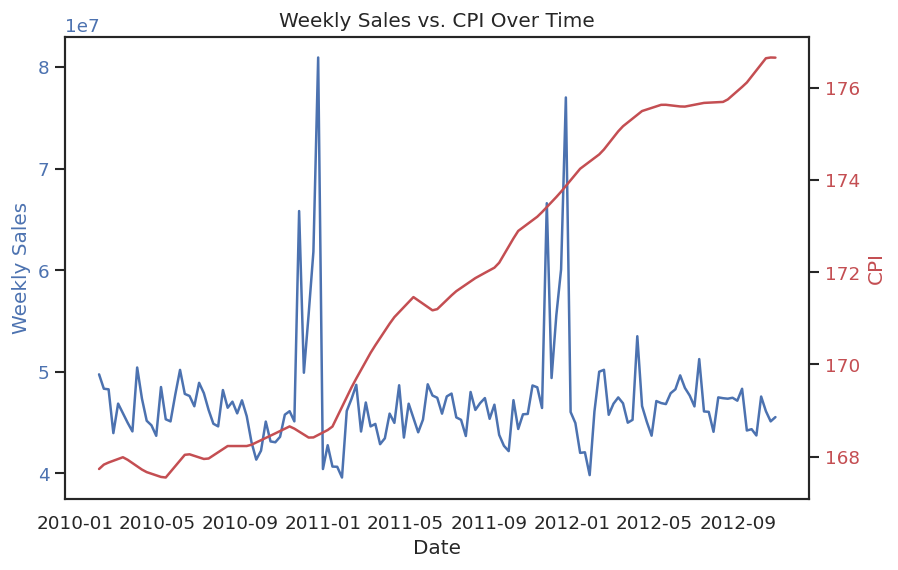

In [180]:


fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['CPI'], color='r', label='CPI')
ax2.set_ylabel('CPI', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. CPI Over Time')


**Observation**: since CPI mainly indicates inflation, it has no direct correlation with sales overtime.

In [181]:
df['Unemployment'].describe()

count    6435.000000
mean        7.999151
std         1.875885
min         3.879000
25%         6.891000
50%         7.874000
75%         8.622000
max        14.313000
Name: Unemployment, dtype: float64

In [182]:
Unemployment= df.groupby('Date')['Unemployment'].mean().reset_index()
Unemployment

Date  Unemployment
0   2010-02-05      8.619311
1   2010-02-12      8.619311
2   2010-02-19      8.619311
3   2010-02-26      8.619311
4   2010-03-05      8.619311
..         ...           ...
138 2012-09-28      7.237333
139 2012-10-05      6.953711
140 2012-10-12      6.953711
141 2012-10-19      6.953711
142 2012-10-26      6.953711

[143 rows x 2 columns]

In [183]:
date_sales= pd.merge(Unemployment, date_sales, on='Date', how='inner')
date_sales

Date  Unemployment         CPI  Fuel_Price  Holiday_Flag  \
0   2010-02-05      8.619311  167.730885    2.717844           0.0   
1   2010-02-12      8.619311  167.825608    2.694022           1.0   
2   2010-02-19      8.619311  167.871686    2.672067           0.0   
3   2010-02-26      8.619311  167.909657    2.683933           0.0   
4   2010-03-05      8.619311  167.947628    2.731200           0.0   
..         ...           ...         ...         ...           ...   
138 2012-09-28      7.237333  176.373588    3.854578           0.0   
139 2012-10-05      6.953711  176.505052    3.845222           0.0   
140 2012-10-12      6.953711  176.636515    3.896733           0.0   
141 2012-10-19      6.953711  176.652613    3.880000           0.0   
142 2012-10-26      6.953711  176.649482    3.791489           0.0   

     Temperature  index  Weekly_Sales  
0      34.037333      0   49750740.50  
1      34.151333      1   48336677.63  
2      37.719778      2   48276993.78  
3      39.243556      3   43968571.13  
4      42.917333      4   46871470.30  
..           ...    ...           ...  
138    68.754444    138   43734899.40  
139    65.973111    139   47566639.31  
140    58.342667    140   46128514.25  
141    60.705333    141   45122410.57  
142    61.051111    142   45544116.29  

[143 rows x 8 columns]

Text(0.5, 1.0, 'Weekly Sales vs. Unemployment Over Time')

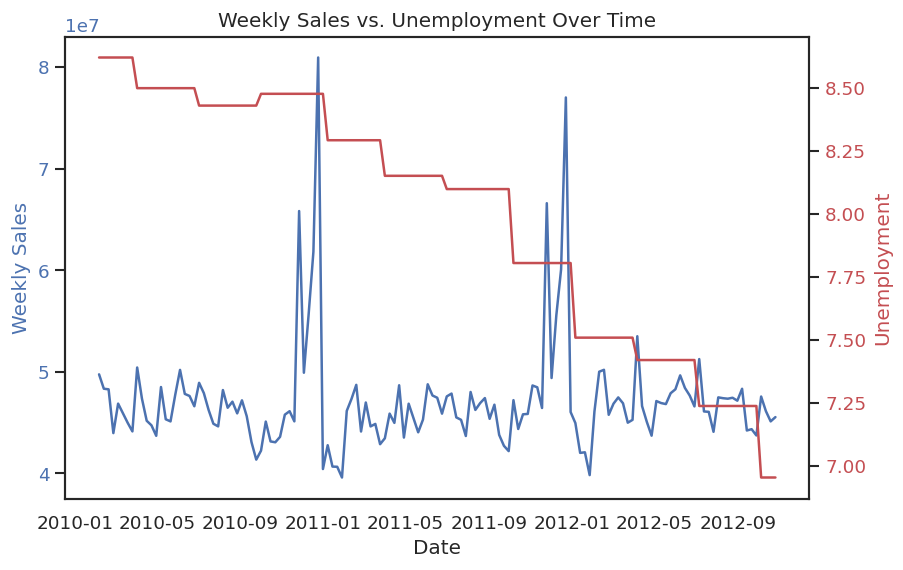

In [184]:


fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Unemployment'], color='r', label='Unemployment')
ax2.set_ylabel('Unemployment', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Unemployment Over Time')


**Observation**: unemployement doesn't affect sales. however it decreases considerably over time

In [185]:
df[df['Date']=='2010-02-05']['CPI']

0       211.096358
143     210.752605
286     214.424881
429     126.442065
572     211.653972
715     212.622352
858     189.381697
1001    214.471451
1144    214.655459
1287    126.442065
1430    214.424881
1573    126.442065
1716    126.442065
1859    181.871190
2002    131.527903
2145    189.381697
2288    126.442065
2431    131.527903
2574    131.527903
2717    204.247194
2860    210.752605
3003    135.352461
3146    131.527903
3289    131.527903
3432    204.247194
3575    131.527903
3718    135.352461
3861    126.442065
4004    131.527903
4147    210.752605
4290    210.752605
4433    189.381697
4576    126.442065
4719    126.442065
4862    135.352461
5005    209.852966
5148    209.852966
5291    126.442065
5434    209.852966
5577    131.527903
5720    189.381697
5863    126.442065
6006    203.064274
6149    126.442065
6292    181.871190
Name: CPI, dtype: float64

- sales over the years

In [186]:
date_sales= date_sales.reset_index()

In [187]:
sales_2010= date_sales[date_sales['Date'].dt.year == 2010]['Weekly_Sales']
sales_2010

0     49750740.50
1     48336677.63
2     48276993.78
3     43968571.13
4     46871470.30
5     45925396.51
6     44988974.64
7     44133961.05
8     50423831.26
9     47365290.44
10    45183667.08
11    44734452.56
12    43705126.71
13    48503243.52
14    45330080.20
15    45120108.06
16    47757502.56
17    50188543.12
18    47826546.72
19    47622046.23
20    46609036.29
21    48917484.50
22    47899529.37
23    46243899.58
24    44888849.11
25    44630363.42
26    48204999.12
27    46464418.41
28    47060952.92
29    45909740.44
30    47194257.61
31    45634397.84
32    43080726.51
33    41358514.41
34    42239875.87
35    45102974.23
36    43149473.45
37    43066669.52
38    43602830.95
39    45781981.89
40    46124800.83
41    45125584.18
42    65821003.24
43    49909027.88
44    55666770.39
45    61820799.85
46    80931415.60
47    40432519.00
Name: Weekly_Sales, dtype: float64

In [188]:
sales_2011= date_sales[date_sales['Date'].dt.year == 2011]['Weekly_Sales']
sales_2011

48    42775787.77
49    40673678.04
50    40654648.03
51    39599852.99
52    46153111.12
53    47336192.79
54    48716164.12
55    44125859.84
56    46980603.74
57    44627319.40
58    44872325.97
59    42876199.18
60    43458991.19
61    45887466.80
62    44973328.14
63    48676692.06
64    43530032.78
65    46861958.29
66    45446144.82
67    44046598.01
68    45293457.04
69    48771994.18
70    47669734.66
71    47447561.77
72    45884094.58
73    47578519.50
74    47859263.78
75    45515929.92
76    45274411.39
77    43683274.28
78    48015466.97
79    46249569.21
80    46917347.62
81    47416948.45
82    45376623.27
83    46763227.53
84    43793960.08
85    42718096.73
86    42195830.81
87    47211688.36
88    44374820.30
89    45818953.44
90    45855821.05
91    48655544.30
92    48474224.75
93    46438980.56
94    66593605.26
95    49390556.49
96    55561147.70
97    60085695.94
98    76998241.31
99    46042461.04
Name: Weekly_Sales, dtype: float64

In [189]:
sales_2012= date_sales[date_sales['Date'].dt.year == 2012]['Weekly_Sales']
sales_2012

100    44955421.95
101    42023078.48
102    42080996.56
103    39834974.67
104    46085608.09
105    50009407.92
106    50197056.96
107    45771506.57
108    46861034.97
109    47480454.11
110    46901504.94
111    44993794.45
112    45272862.02
113    53502315.87
114    46629261.41
115    45072529.78
116    43716798.89
117    47124197.93
118    46925878.99
119    46823939.22
120    47892463.31
121    48281649.72
122    49651171.78
123    48412110.70
124    47668284.97
125    46597112.12
126    51253021.88
127    46099732.10
128    46059543.45
129    44097154.97
130    47485899.56
131    47403451.04
132    47354452.05
133    47447323.60
134    47159639.43
135    48330059.31
136    44226038.65
137    44354547.11
138    43734899.40
139    47566639.31
140    46128514.25
141    45122410.57
142    45544116.29
Name: Weekly_Sales, dtype: float64

In [190]:
combined_data = pd.concat([sales_2010, sales_2011, sales_2012], keys=['2010', '2011', '2012'])
combined_data

2010  0      49750740.50
      1      48336677.63
      2      48276993.78
      3      43968571.13
      4      46871470.30
                ...     
2012  138    43734899.40
      139    47566639.31
      140    46128514.25
      141    45122410.57
      142    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [191]:
px.box(combined_data, x=combined_data.index.get_level_values(0), y='Weekly_Sales',
             labels={'Weekly_Sales': 'Weekly Sales', 'level_0': 'Year'},
             title='Box Plot for 2010, 2011, and 2012')

**Observation**: sales was maximum in 2010 . The median of all 3 years were almost the same . sales was minimum in 2011

## Model Building

In [192]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

<h5><font  color='Red'>How do Consumer Price Index (CPI) and unemployment rate correlate with sales?</font> </h5>

In [193]:
sales_group = df.groupby(['Date'])[['Weekly_Sales']].mean()
sales_group

Weekly_Sales
Date                    
2010-02-05  1.105572e+06
2010-02-12  1.074148e+06
2010-02-19  1.072822e+06
2010-02-26  9.770794e+05
2010-03-05  1.041588e+06
...                  ...
2012-09-28  9.718867e+05
2012-10-05  1.057036e+06
2012-10-12  1.025078e+06
2012-10-19  1.002720e+06
2012-10-26  1.012091e+06

[143 rows x 1 columns]

To test stationarity, we will use **Augmented Dickey Fuller Test** :

- Null Hypothesis : It assumes that the time series is non-stationary.
- Alternate Hypothesis : If the null hypothesis is rejected, then the time series is stationary.

For the Null Hypothesis to be rejected and accepting that the time series is stationary, there are 2 requirements :

- Critical Value (5%) > Test Statistic
- p-value < 0.05


In [194]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    df_test = adfuller(timeseries['Weekly_Sales'], autolag='AIC')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

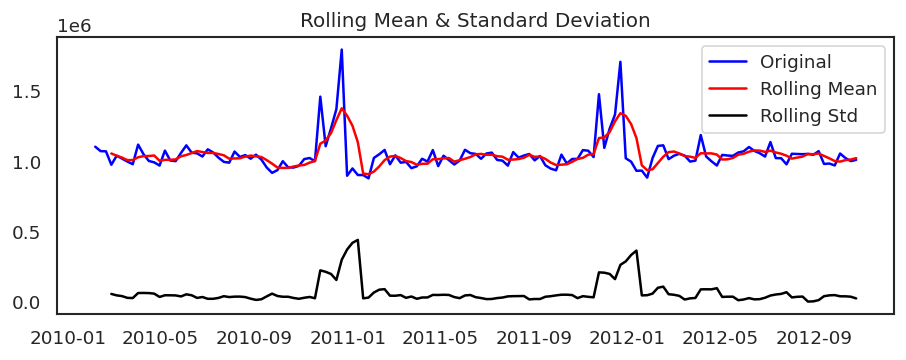

Results of Dickey Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [195]:
test_stationarity(sales_group)

**Observation**: P-value is very small (much smaller than 0.05) which indicates that the data is stationary. Also, the critical values are somehow close to the Test Statistic which also implies that our data is stationary. However, the plot shows that rolling mean is almost as close to the original timeseries but rolling std is not close at all

<h5><font  color='Red'>Data Transformation To Achieve Stationarity</font> </h5>

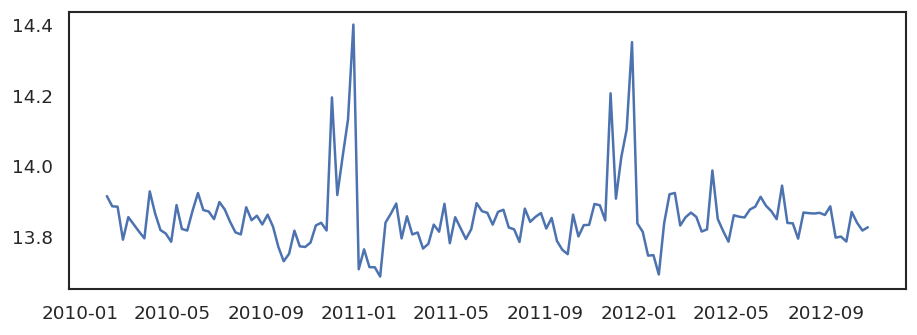

In [196]:
sales_group_log = np.log(sales_group)
plt.plot(sales_group_log)

**Observation**: No difference 

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

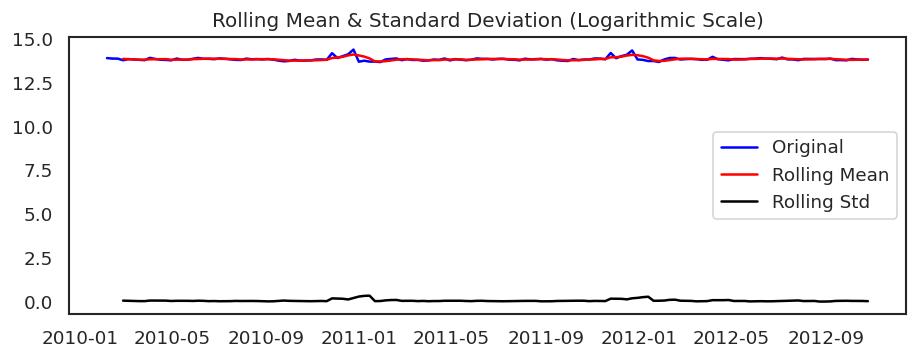

In [197]:
rollmean_log = sales_group_log.rolling(window=4).mean()
rollstd_log = sales_group_log.rolling(window=4).std()
plt.plot(sales_group_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

**Observation**: Rolling mean is now closer to the log of timeseries and also the seasonality component has decreased

<h5><font  color='Red'>Time shift Transformation</font> </h5>

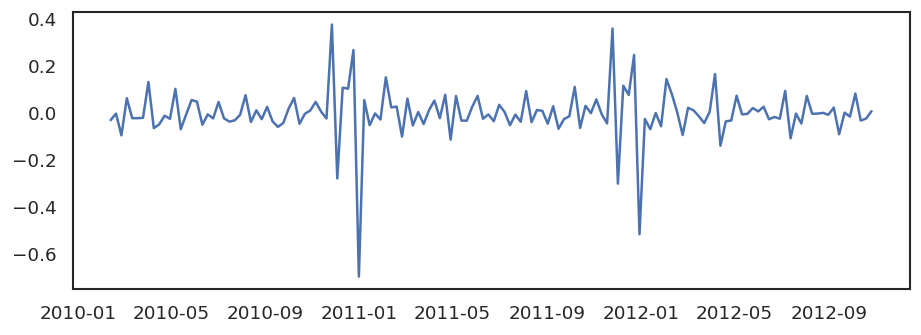

In [198]:
sales_group_log_diff = sales_group_log - sales_group_log.shift()
plt.plot(sales_group_log_diff)

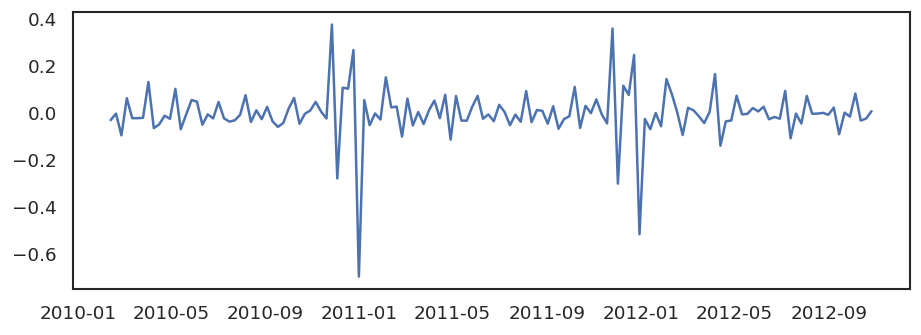

In [199]:
sales_group_log_diff.dropna(inplace=True)
plt.plot(sales_group_log_diff)

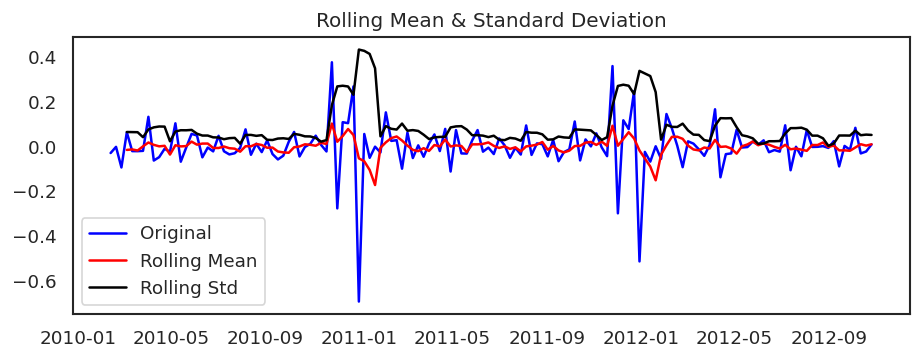

Results of Dickey Fuller Test:
Test Statistic                -6.747059e+00
p-value                        3.016343e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [200]:
test_stationarity(sales_group_log_diff)

**Observation**: P-value is <0.05 , critical value is close to the Test Statistic and the plot is showing that rolling std, rolling mean all align well with the original timeseries

<h5><font  color='Red'>Decomposition</font> </h5>

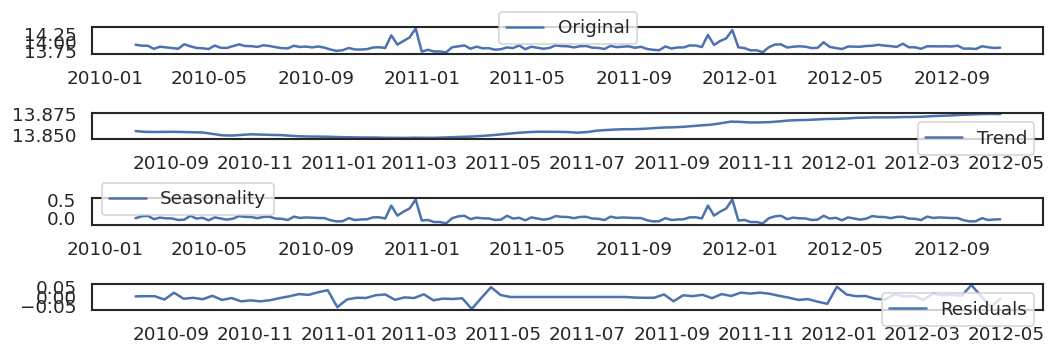

In [201]:
decomposition = seasonal_decompose(sales_group_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sales_group_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Observation**: Data clearly has a linear uptrend and a seasonal pattern of a 1 year duration is present in the data.

In [202]:
residual

Date
2010-02-05   NaN
2010-02-12   NaN
2010-02-19   NaN
2010-02-26   NaN
2010-03-05   NaN
              ..
2012-09-28   NaN
2012-10-05   NaN
2012-10-12   NaN
2012-10-19   NaN
2012-10-26   NaN
Name: resid, Length: 143, dtype: float64

In [203]:
residual.dropna(inplace=True)

In [204]:
residual.isnull().sum()

0

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

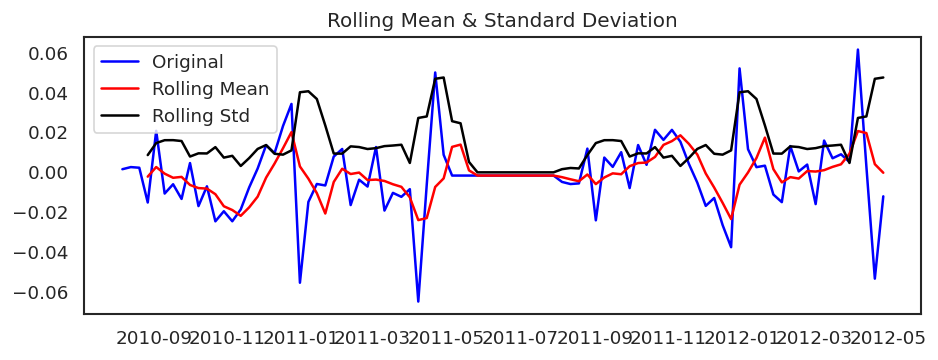

In [205]:
rollmean_decompose = residual.rolling(window=4).mean()
rollstd_decompose = residual.rolling(window=4).std()

plt.plot(residual, color='blue', label='Original')
plt.plot(rollmean_decompose, color='red', label='Rolling Mean')
plt.plot(rollstd_decompose, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

<h5><font  color='Red'>ACF and PCF</font> </h5>

In [206]:
lag_acf = acf(sales_group_log_diff, nlags=20)
lag_pacf = pacf(sales_group_log_diff, nlags=20, method='ols')

In [207]:
lag_acf

array([ 1.        , -0.39842753,  0.04048684, -0.18774719,  0.36750569,
       -0.38001666, -0.00941484,  0.0509206 ,  0.05462347, -0.05151634,
       -0.02769163,  0.08611025, -0.05083731, -0.00701861, -0.07294868,
        0.09426309, -0.01269779,  0.04794341, -0.06265297,  0.04498831,
       -0.00204038])

In [208]:
lag_pacf

array([ 1.        , -0.39844914, -0.14067131, -0.27457746,  0.23315064,
       -0.22596219, -0.29150052, -0.0360698 , -0.17440582,  0.03542065,
       -0.07683103, -0.11787787, -0.06044625, -0.12491501, -0.15009801,
       -0.06752819, -0.05218957,  0.02416982, -0.05575776, -0.10978145,
       -0.03266743])

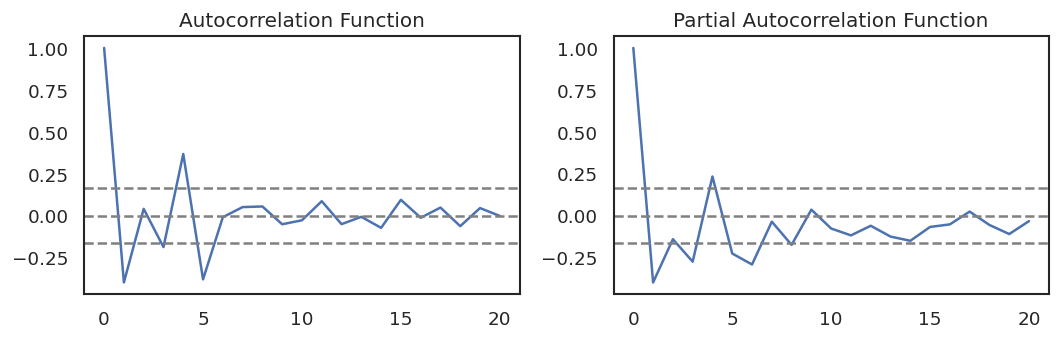

In [209]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales_group_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

**Observation**: From the ACF plot, we can see that curve touches y=0.0 line at x=1. Thus, from theory, Q = 1 From the PACF plot, we see that curve touches y=0.0 line at x=1. Thus, from theory, P = 1

<h5><font  color='Red'>AR Model</font> </h5>

**Auto Regression (AR)** is the kind of model that uses data from the same input variable at previous time steps.
    It's principle in predicting the future values is that observations at previous time steps are very significant in predicting the values in the future.
    This relationship between observations is known as correlation. There are 2 types of correlation :
        Positive Correlation : Both values of the observations move in the same direction
        Negative Correlation : Both values of the observations move in the opposite direction
    Since the relation between observations at the present times and those in the past times (lag values) is calculated, it is known as Autocorrelation.
    The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

Plotting AR model


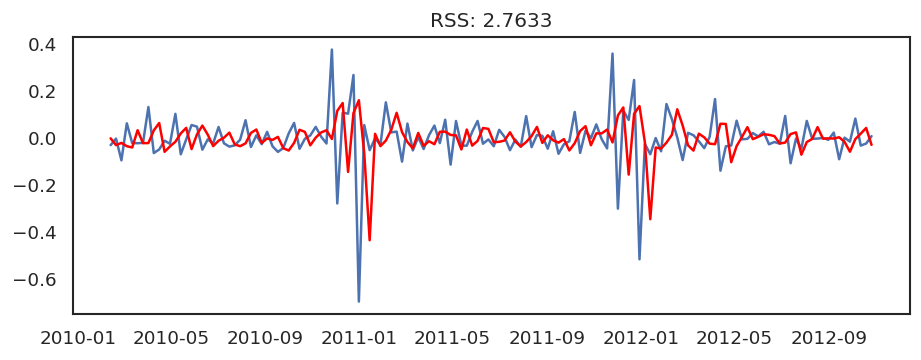

In [210]:
model1 = ARIMA(sales_group_log_diff, order=(1,1,0))
results_AR = model1.fit()
plt.plot(sales_group_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - sales_group_log_diff['Weekly_Sales'])**2))
print('Plotting AR model')

<h5><font  color='Red'>MA Model</font> </h5>

**Moving Average (MA)** is the kind of model that assumes the current value is linearly dependent on the current and past error terms.
    In this model, a rolling window i.e a specific number of values are averaged that assist in predicting the future values. Order of the model governs the mathematical fomula used for forecasting.
    In order to find the order of the MA model, autocorrelation graph is looked at by assuming the time series has been made stationary.
    We try to find the significant lags from the plot i.e lag values that are outside the confidence interval and the lags succeding it becomes redundant by staying the confidence interval.
    If none of the significant lags are found, MA model becomes redundant and it is known as random walk.

Plotting AR model


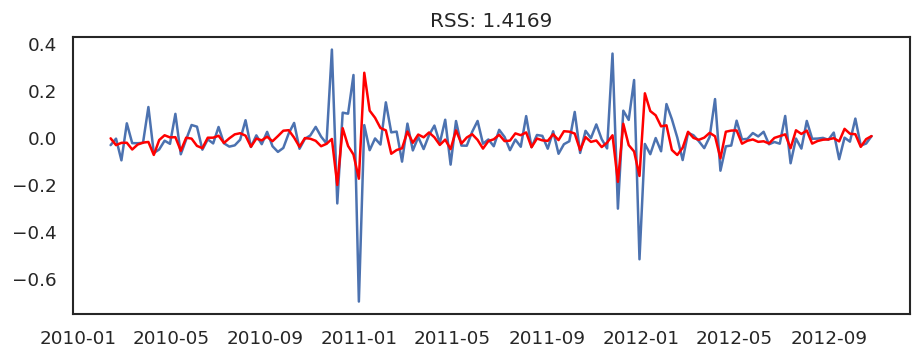

In [211]:
model1 = ARIMA(sales_group_log_diff, order=(0,1,2))
results_MA = model1.fit()
plt.plot(sales_group_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - sales_group_log_diff['Weekly_Sales'])**2))
print('Plotting AR model')

<h5><font  color='Red'>ARMA Model</font> </h5>
As the name suggests, it is a combination of the previous 2 models:
        Auto Regression (p)
        Moving Average (q)
    It utilizes the features of these models for forecasting.
    It's order only has 2 parameters (p, q) from the 2 models. Order selection of these 2 models is same as the above 2 models.
    From the previous 2 models, we set the order as (0, 0).


Plotting AR model


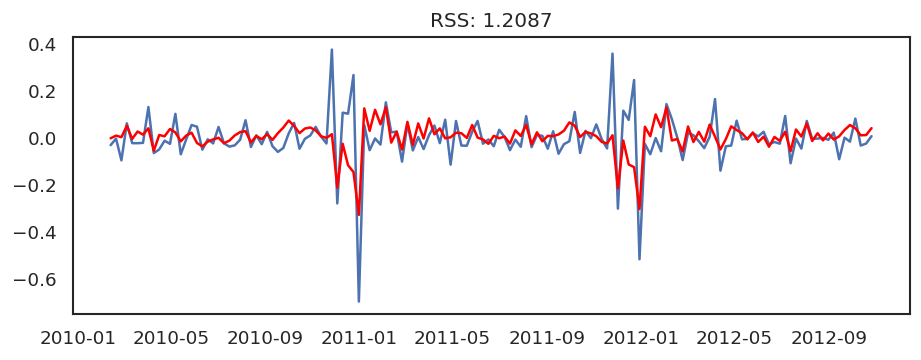

In [212]:
model1 = ARIMA(sales_group_log_diff, order=(2,0,2))
results_ARMA = model1.fit()
plt.plot(sales_group_log_diff)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARMA.fittedvalues - sales_group_log_diff['Weekly_Sales'])**2))
print('Plotting AR model')

<h5><font  color='Red'>ARIMA Model</font> </h5>

**ARIMA model** is a combination of 3 models :
        AR (p) : Auto Regressive
        I (d) : Integrated
        MA (q) : Moving Average

(p,d,q) is known as the order of the ARIMA model. Values of these parameters are based on the above mentioned models.
        p : Number of auto regressive terms.
        d : Number of differencing orders required to make the time series stationary.
        q : Number of lagged forecast errors in the prediction equation.
Selection criteria for the order of ARIMA model :
        p : Lag value where the Partial Autocorrelation (PACF) graph cuts off or drops to 0 for the 1st instance.
        d : Number of times differencing is carried out to make the time series stationary.
        q : Lag value where the Autocorrelation (ACF) graph crosses the upper confidence interval for the 1st instance.


Plotting AR model


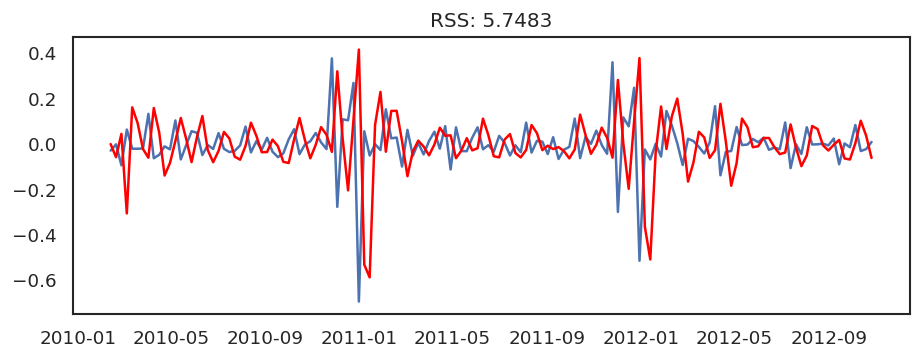

In [213]:
model1 = ARIMA(sales_group_log_diff, order=(2,3,1))
results_ARIMA = model1.fit()
plt.plot(sales_group_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - sales_group_log_diff['Weekly_Sales'])**2))
print('Plotting AR model')

**Observation**: ARMA Model has the lowest RSS and hence the best model out of 3 models

<h3><font  color='Red'>Prediction and reverse transformation</font> </h3>

In [214]:
predictions_ARMA_diff = pd.Series(results_ARMA.fittedvalues, copy=True)
predictions_ARMA_diff.head()

Date
2010-02-12    0.000294
2010-02-19    0.011526
2010-02-26    0.005194
2010-03-05    0.053300
2010-03-12   -0.002155
dtype: float64

In [215]:
predictions_ARMA_diff_cumsum = predictions_ARMA_diff.cumsum()
predictions_ARMA_diff_cumsum.head()

Date
2010-02-12    0.000294
2010-02-19    0.011820
2010-02-26    0.017014
2010-03-05    0.070314
2010-03-12    0.068159
dtype: float64

In [216]:
predictions_ARMA_log = pd.Series(sales_group_log['Weekly_Sales'].iloc[0], index=sales_group_log.index)
predictions_ARMA_log = predictions_ARMA_log.add(predictions_ARMA_diff_cumsum, fill_value=0)
predictions_ARMA_log.head()

Date
2010-02-05    13.915873
2010-02-12    13.916168
2010-02-19    13.927694
2010-02-26    13.932887
2010-03-05    13.986187
dtype: float64

In [217]:
sales_group_log.head()

Weekly_Sales
Date                    
2010-02-05     13.915873
2010-02-12     13.887039
2010-02-19     13.885803
2010-02-26     13.792323
2010-03-05     13.856257

**Observation**: Predictions are very close to the original log values

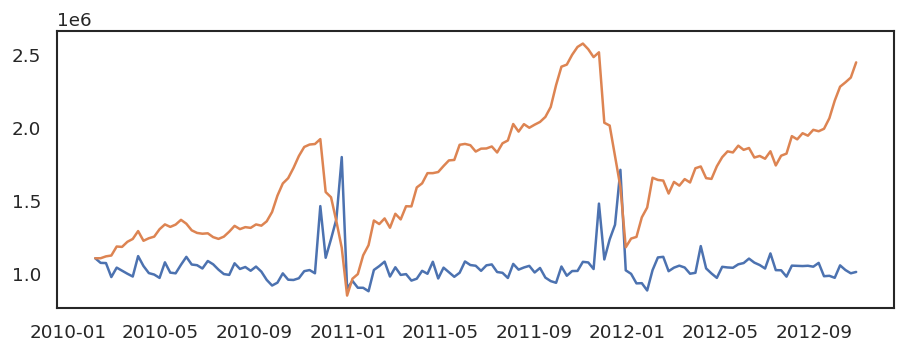

In [218]:
predictions_ARMA = np.exp(predictions_ARMA_log)
plt.plot(sales_group)
plt.plot(predictions_ARMA)

**Observation**: Predictions are very far from the original timeseries

In [219]:
sales_group.shape

(143, 1)

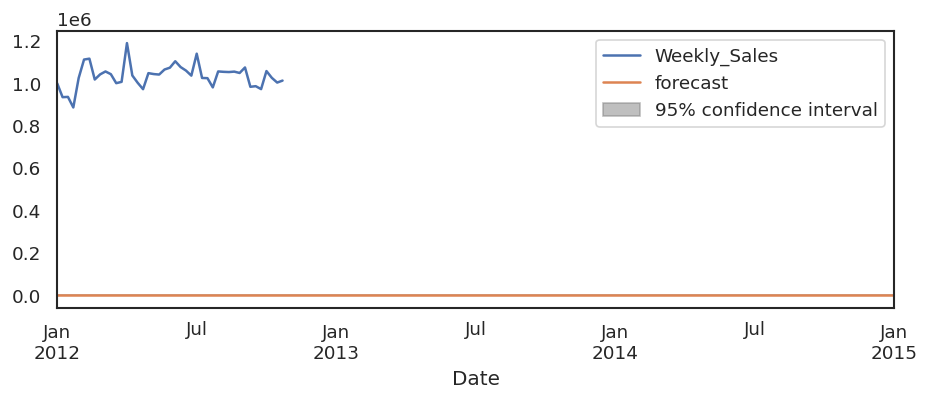

In [220]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()

ax = sales_group.loc['2012':].plot(ax=ax)
plot_predict(results_ARMA, '2012', '2015', ax=ax)
plt.show()

## Another method for model building

In [221]:
sales_group

Weekly_Sales
Date                    
2010-02-05  1.105572e+06
2010-02-12  1.074148e+06
2010-02-19  1.072822e+06
2010-02-26  9.770794e+05
2010-03-05  1.041588e+06
...                  ...
2012-09-28  9.718867e+05
2012-10-05  1.057036e+06
2012-10-12  1.025078e+06
2012-10-19  1.002720e+06
2012-10-26  1.012091e+06

[143 rows x 1 columns]

In [222]:
#data is sampled every month
y= df.set_index('Date')
y = y['Weekly_Sales'].resample('MS').mean()
y

Date
2010-02-01    1.057405e+06
2010-03-01    1.010666e+06
2010-04-01    1.028499e+06
2010-05-01    1.037283e+06
2010-06-01    1.068034e+06
2010-07-01    1.033689e+06
2010-08-01    1.042445e+06
2010-09-01    9.848216e+05
2010-10-01    9.651637e+05
2010-11-01    1.126963e+06
2010-12-01    1.283380e+06
2011-01-01    9.094665e+05
2011-02-01    1.035174e+06
2011-03-01    9.964247e+05
2011-04-01    1.006784e+06
2011-05-01    1.009156e+06
2011-06-01    1.054297e+06
2011-07-01    1.021828e+06
2011-08-01    1.047774e+06
2011-09-01    9.815455e+05
2011-10-01    1.018118e+06
2011-11-01    1.167569e+06
2011-12-01    1.280347e+06
2012-01-01    9.383026e+05
2012-02-01    1.067020e+06
2012-03-01    1.028932e+06
2012-04-01    1.049561e+06
2012-05-01    1.048703e+06
2012-06-01    1.069379e+06
2012-07-01    1.041719e+06
2012-08-01    1.052670e+06
2012-09-01    1.003586e+06
2012-10-01    1.024232e+06
Freq: MS, Name: Weekly_Sales, dtype: float64

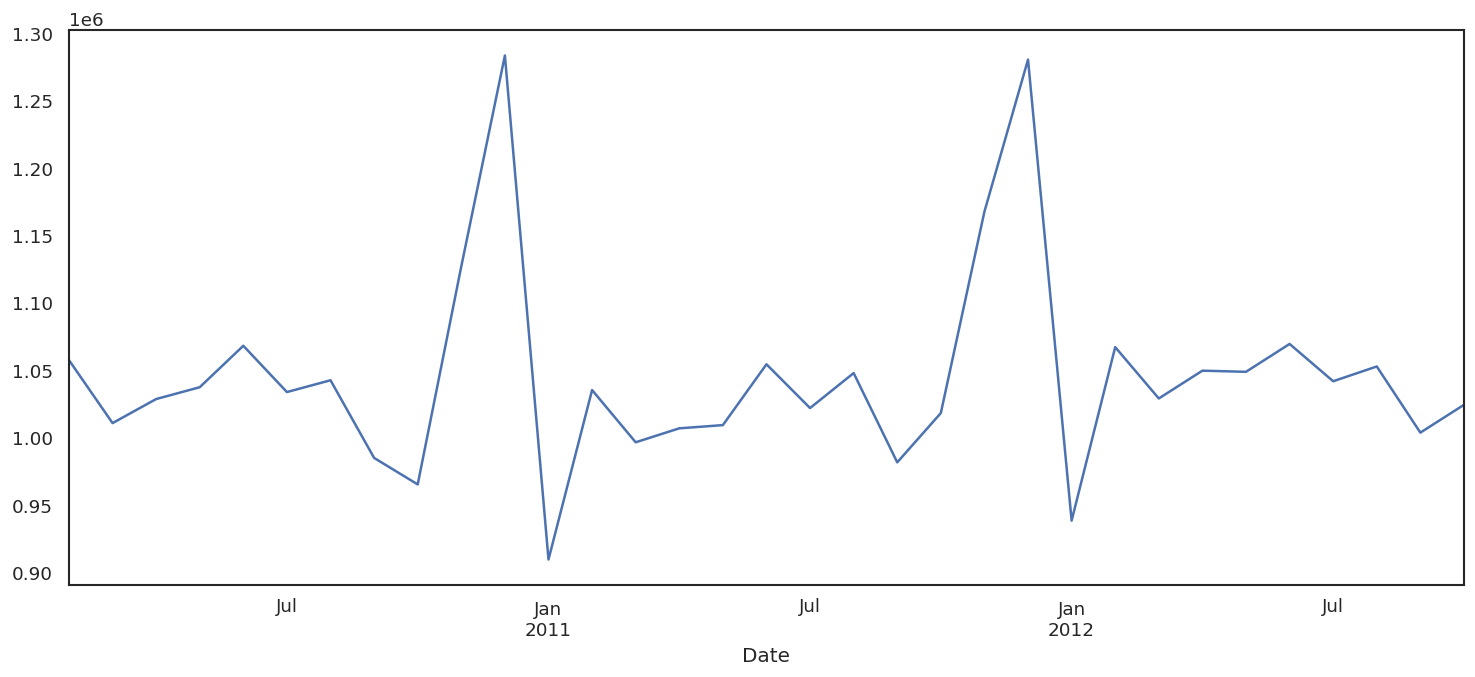

In [223]:
y.plot(figsize=(15, 6))
plt.show()

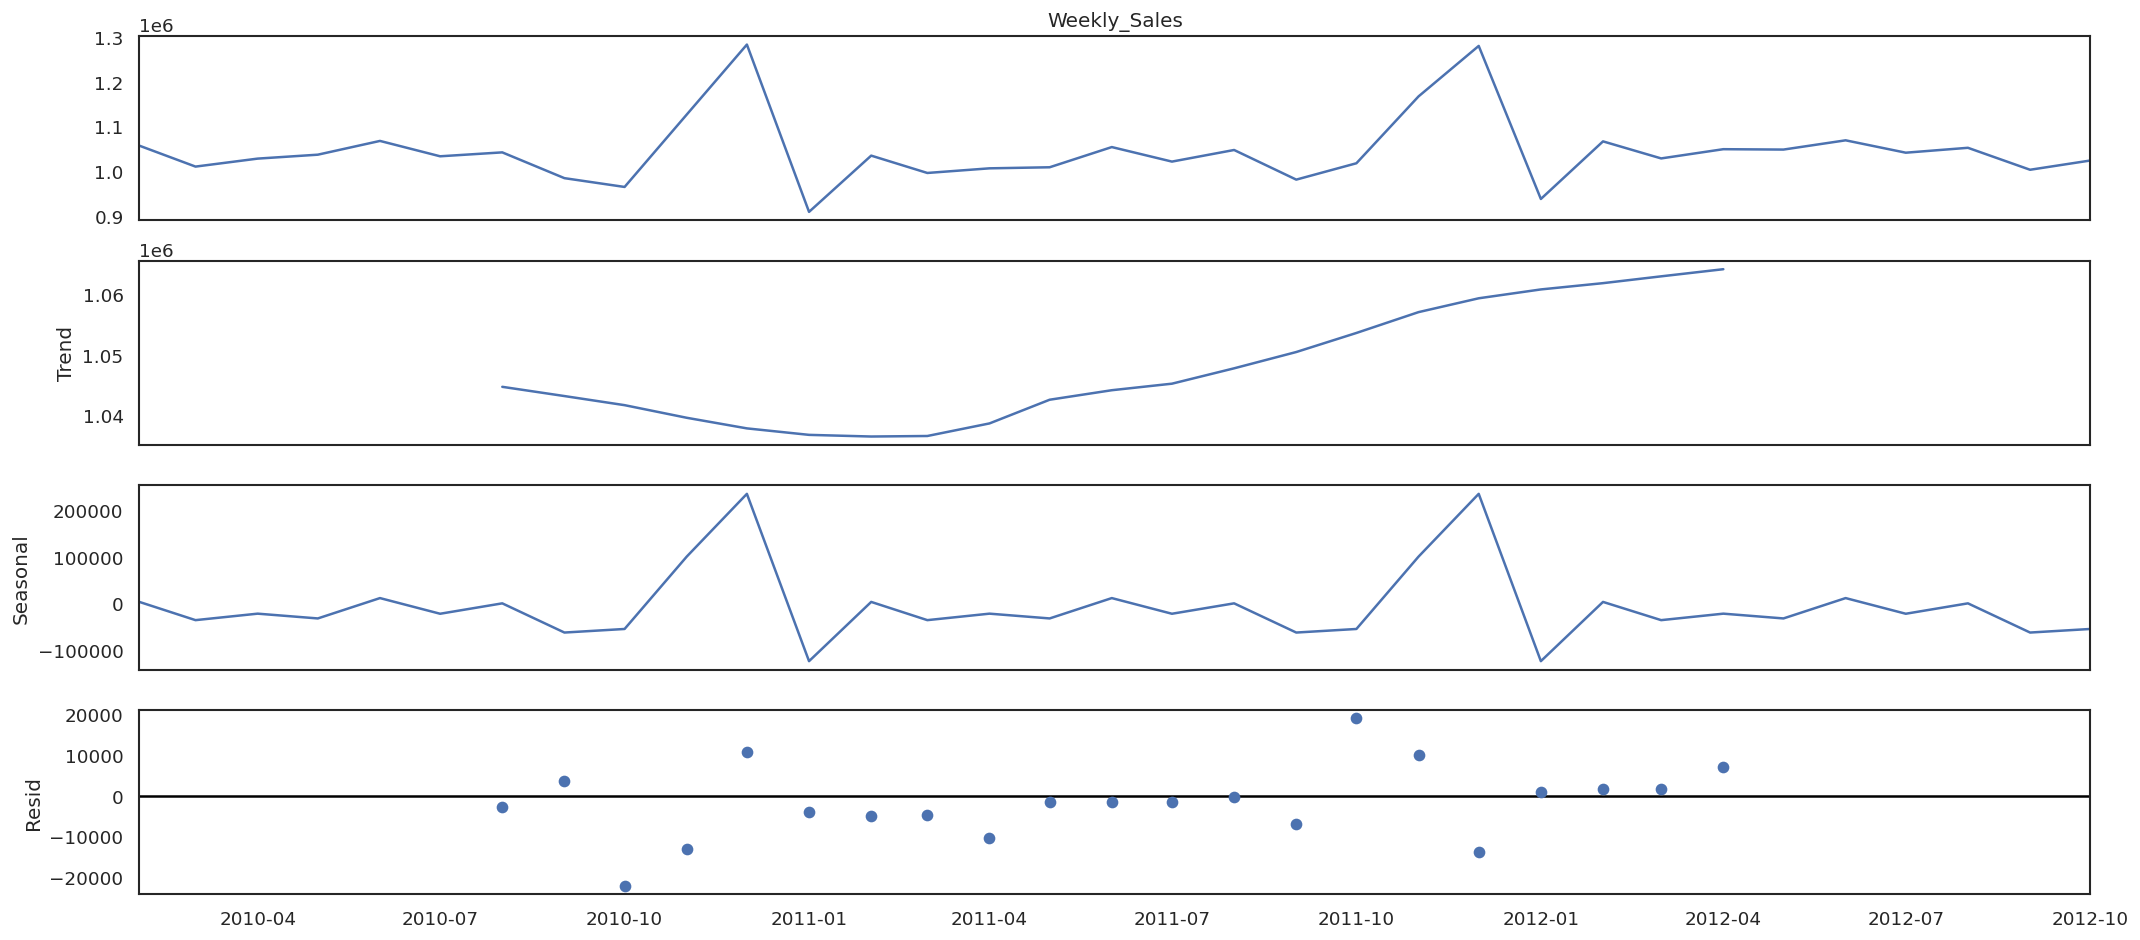

In [224]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

<h3><font  color='Red'>Applying ARIMA Model</font> </h3>

In [225]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [226]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48179D+01    |proj g|=  3.55273D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.553D-10   1.482D+01
  F =   14.817925435661468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:979.983078753657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     17      1     0     0   5.954D-03   7.320D+00
  F =   7.3202058393600993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:487.1335853977666
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68171D+01    |proj g|=  1.17508D+02

At iterate    5    f=  7.50034D+00    |proj g|=  5.29964D+00

At iterate   10    f=  7.38158D+00    |proj g|=  7.48450D-06

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.51137D+00    |proj g|=  2.24038D-03

At iterate   15    f=  8.51110D+00    |proj g|=  7.75292D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   2.625D-06   8.511D+00
  F =   8.5110970918198952     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:569.7324080601131
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88713D+00    |proj g|=  2.61765D+00

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.35678D+00    |proj g|=  9.79617D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     23      1     0     0   7.484D-06   2.357D+00
  F =   2.3567830356410391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:163.5476803523086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22666D+01    |proj g|=  5.00755D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57288D+00    |proj g|=  6.10778D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.108D-06   2.573D+00
  F =   2.5728753732966534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:173.80977463757912
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.98308D+00    |proj g|=  6.87599D-03

At iterate   10    f=  1.98156D+00    |proj g|=  7.67271D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     24      1     0     0   8.156D-06   1.982D+00
  F =   1.9815257378431443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:136.78069869764752
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87795D+00    |proj g|=  1.94016D+00

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.66940D+00    |proj g|=  6.72426D-02

At iterate   10    f=  2.66086D+00    |proj g|=  1.23691D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   9.084D-06   2.661D+00
  F =   2.6608454418854497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:181.6157991644397
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01477D+00    |proj g|=  5.36008D-02

At iterate    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.64040D+00    |proj g|=  3.87493D-01

At iterate   15    f=  7.61173D+00    |proj g|=  3.11199D-02

At iterate   20    f=  7.60827D+00    |proj g|=  1.29375D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     40      1     0     0   5.306D-06   7.608D+00
  F =   7.6080719348223198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:510.1327476982731
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.63366D+00    |proj g|=  8.53030D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     25      1     0     0   1.280D-05   2.634D+00
  F =   2.6336614911462113     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:181.82165841564995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20813D+01    |proj g|=  2.75772D-01

At iterate    5    f=  1.19566D+01    |proj g|=  4.40232D+01

           * 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  7.18601D+00    |proj g|=  7.26099D+00

At iterate    5    f=  6.49647D+00    |proj g|=  9.07015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   1.384D-07   6.496D+00
  F =   6.4964384604463952     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:434.7649383894621
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33108D+00    |proj g|=  2.65005D-01

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.54740D+00    |proj g|=  1.07037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     17      1     0     0   8.894D-06   7.547D+00
  F =   7.5473984450915008     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:506.12829737603903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34912D+00    |proj g|=  3.96207D-01

At iterate    5    f=  7.23384D+00    |proj g|=  1.21985D-01

At iterate   

 This problem is unconstrained.



At iterate   15    f=  2.30336D+00    |proj g|=  3.60086D-02

At iterate   20    f=  2.30286D+00    |proj g|=  5.78471D-02

At iterate   25    f=  2.30264D+00    |proj g|=  9.98038D-02

At iterate   30    f=  2.30250D+00    |proj g|=  7.70204D-02

At iterate   35    f=  2.30229D+00    |proj g|=  1.88777D-01

At iterate   40    f=  2.30210D+00    |proj g|=  2.70575D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     88      1     0     0   8.605D-02   2.302D+00
  F =   2.3020046878014662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:161.9323093948


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.18630D+00    |proj g|=  5.23806D-02

At iterate   10    f=  7.18411D+00    |proj g|=  1.35686D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   5.926D-06   7.184D+00
  F =   7.1839447260253566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:482.1403519176735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32535D+00    |proj g|=  2.35002D-02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  1.15365D+01    |proj g|=  6.15884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     56      1     0     0   6.048D-03   1.154D+01
  F =   11.536520940113746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:767.4103820475073
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02159D+00    |proj g|=  5.01348D+01

At iterate    5    f=  6.76550D+00    |proj g|=  4.15730D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.98115D+00    |proj g|=  1.35809D-03

At iterate   15    f=  1.98103D+00    |proj g|=  8.19889D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     31      1     0     0   8.199D-06   1.981D+00
  F =   1.9810252582313530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:138.7476670432693
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58748D+01    |proj g|=  2.65543D+02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   6.154D-06   6.762D+00
  F =   6.7616375002180718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:456.2680750143927
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43879D+00    |proj g|=  1.29319D+00

At iterate    5    f=  2.33099D+00    |proj g|=  3.87292D-03

At iterate   10    f=  2.33034D+00    |proj g|=  9.39700D-04

           * *

 This problem is unconstrained.


In [227]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88777D+01    |proj g|=  3.20386D+01

At iterate    5    f=  6.85646D+00    |proj g|=  1.44812D-01

At iterate   10    f=  6.85629D+00    |proj g|=  1.85857D-02

At iterate   15    f=  6.85490D+00    |proj g|=  1.85208D-01


 This problem is unconstrained.



At iterate   20    f=  6.85455D+00    |proj g|=  1.15058D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     38      1     0     0   2.820D-03   6.855D+00
  F =   6.8545401481302219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2106      6.325     -0.033      0.973     -12.607      12.185
ma.L1          0.1977      6.330      0.031      0.975     -12.209      12.605
ar.S.L12      -0.0239      0.022     -1.077  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


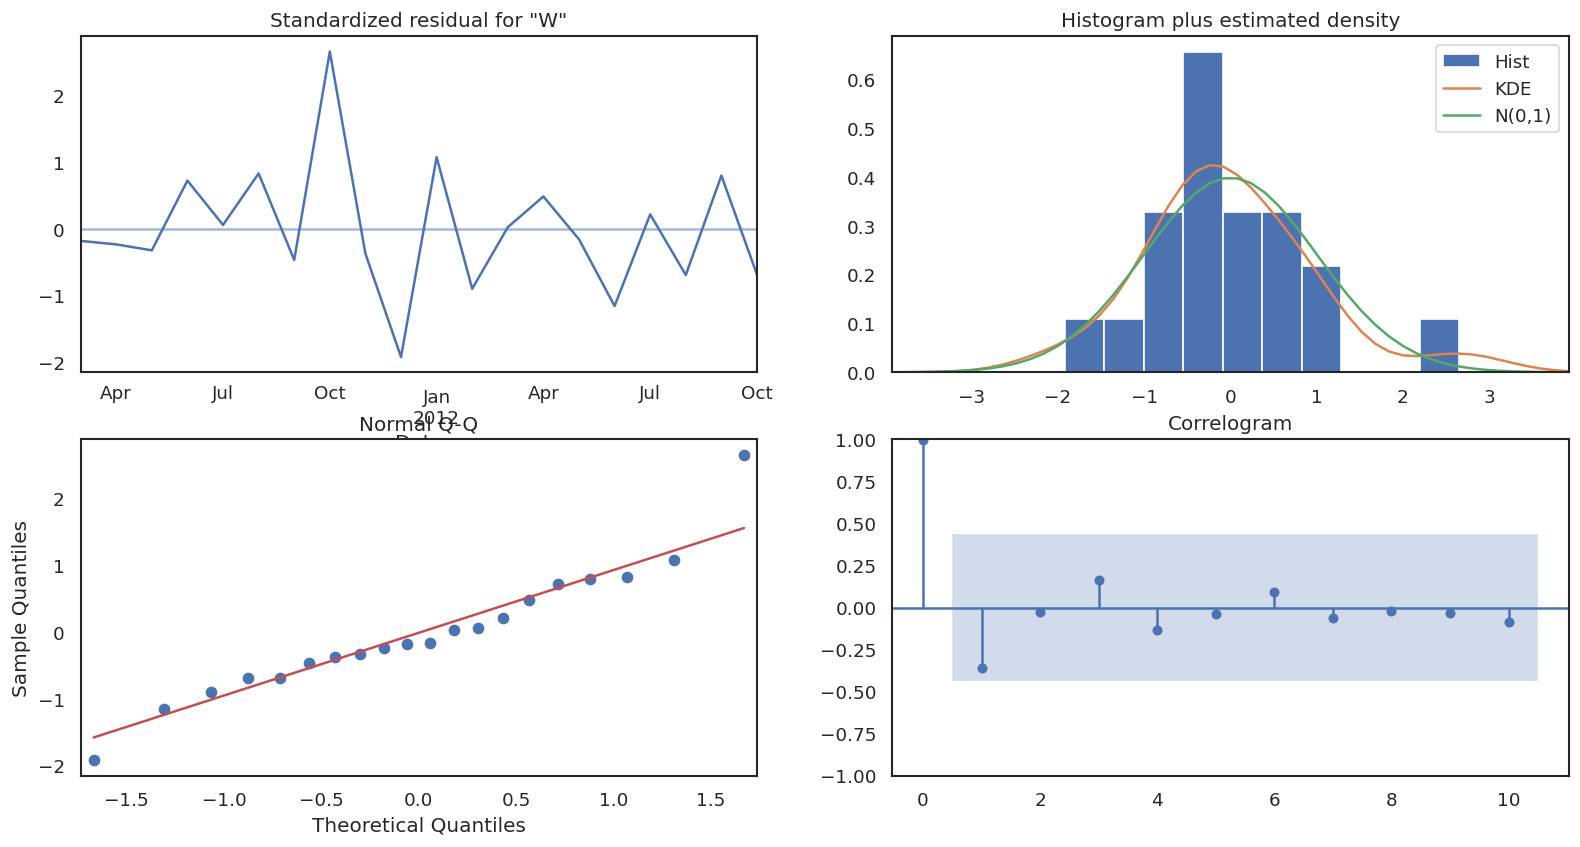

In [228]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Forecasting

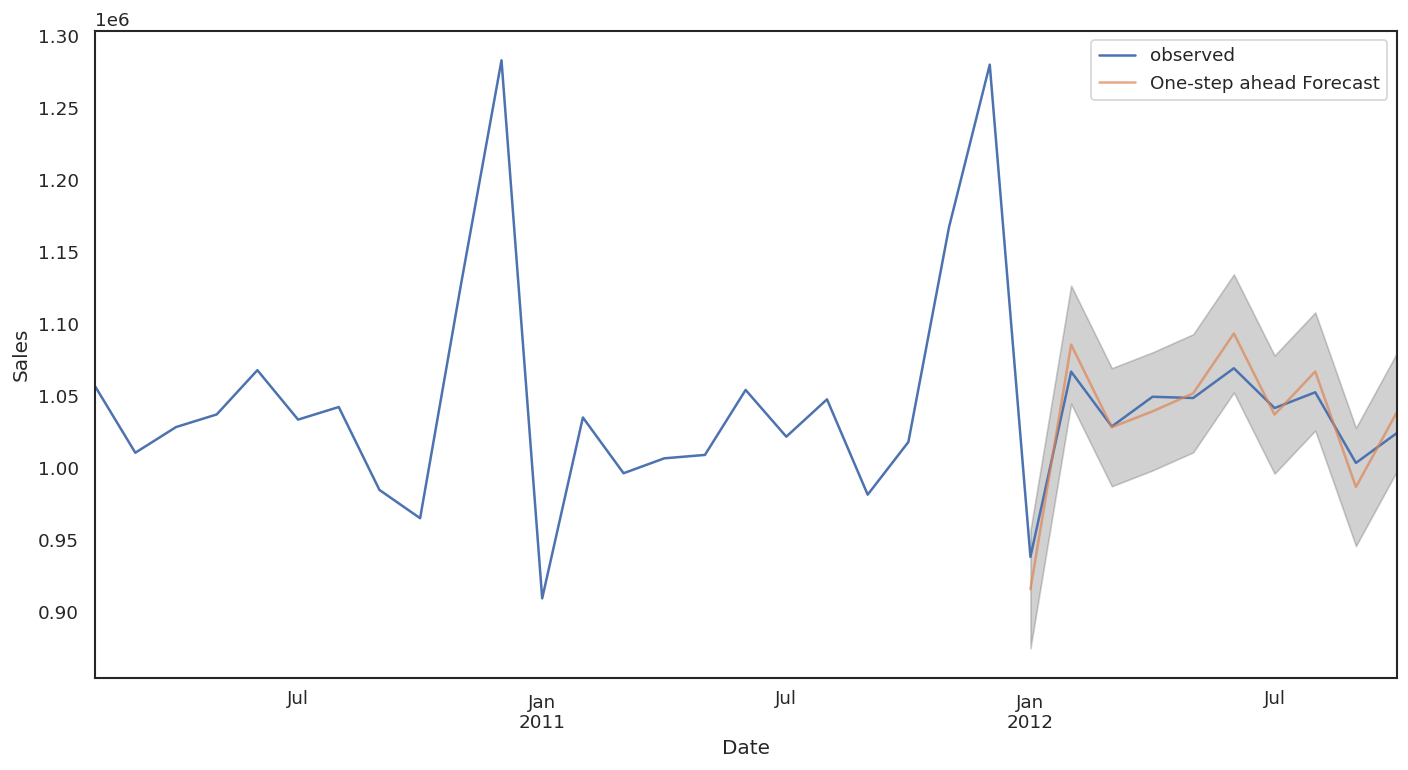

In [229]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [230]:
y_forecasted = pred.predicted_mean
y_truth = y['2010-02-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 227185600.68


In [231]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15072.68


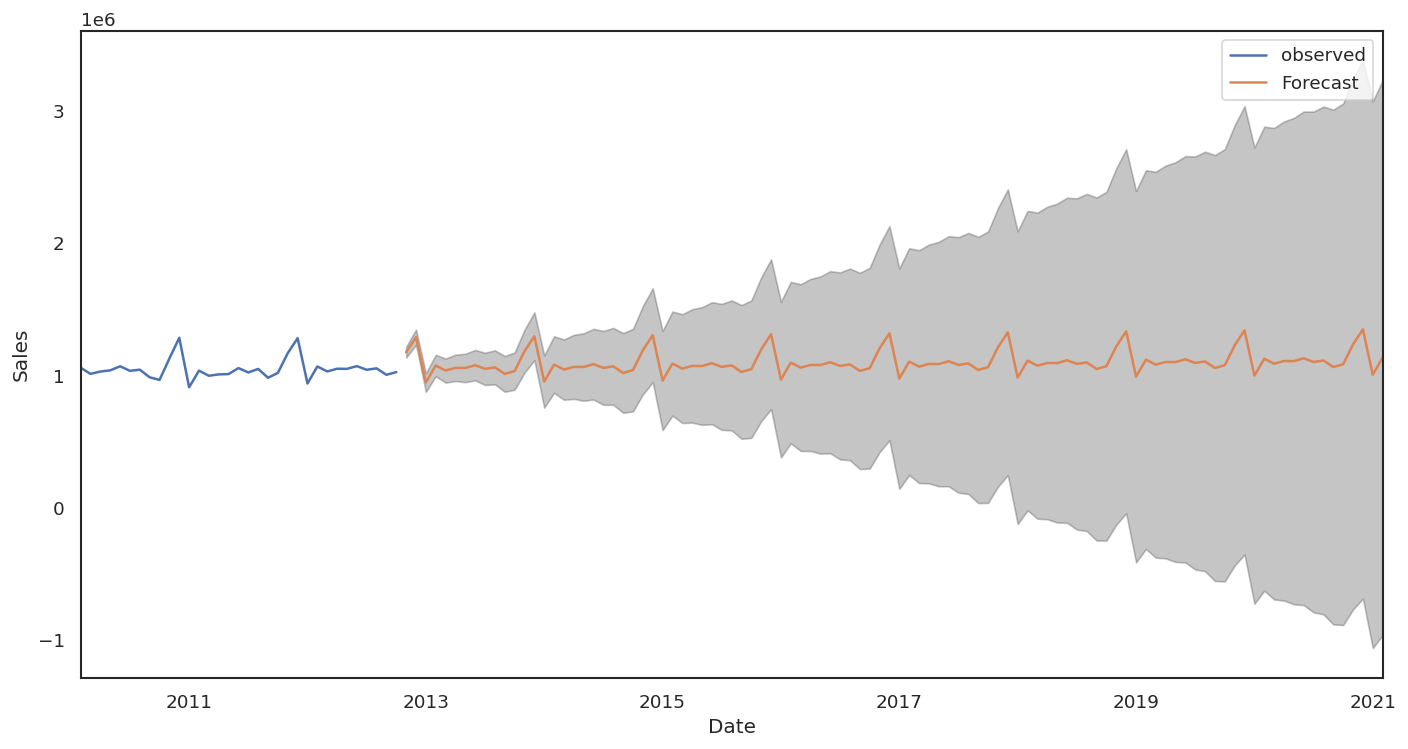

In [232]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

## Third method for model building

In [233]:
#data is sampled every month
y= df.set_index('Date')
y = y['Weekly_Sales'].resample('MS').mean().reset_index()
y

Date  Weekly_Sales
0  2010-02-01  1.057405e+06
1  2010-03-01  1.010666e+06
2  2010-04-01  1.028499e+06
3  2010-05-01  1.037283e+06
4  2010-06-01  1.068034e+06
5  2010-07-01  1.033689e+06
6  2010-08-01  1.042445e+06
7  2010-09-01  9.848216e+05
8  2010-10-01  9.651637e+05
9  2010-11-01  1.126963e+06
10 2010-12-01  1.283380e+06
11 2011-01-01  9.094665e+05
12 2011-02-01  1.035174e+06
13 2011-03-01  9.964247e+05
14 2011-04-01  1.006784e+06
15 2011-05-01  1.009156e+06
16 2011-06-01  1.054297e+06
17 2011-07-01  1.021828e+06
18 2011-08-01  1.047774e+06
19 2011-09-01  9.815455e+05
20 2011-10-01  1.018118e+06
21 2011-11-01  1.167569e+06
22 2011-12-01  1.280347e+06
23 2012-01-01  9.383026e+05
24 2012-02-01  1.067020e+06
25 2012-03-01  1.028932e+06
26 2012-04-01  1.049561e+06
27 2012-05-01  1.048703e+06
28 2012-06-01  1.069379e+06
29 2012-07-01  1.041719e+06
30 2012-08-01  1.052670e+06
31 2012-09-01  1.003586e+06
32 2012-10-01  1.024232e+06

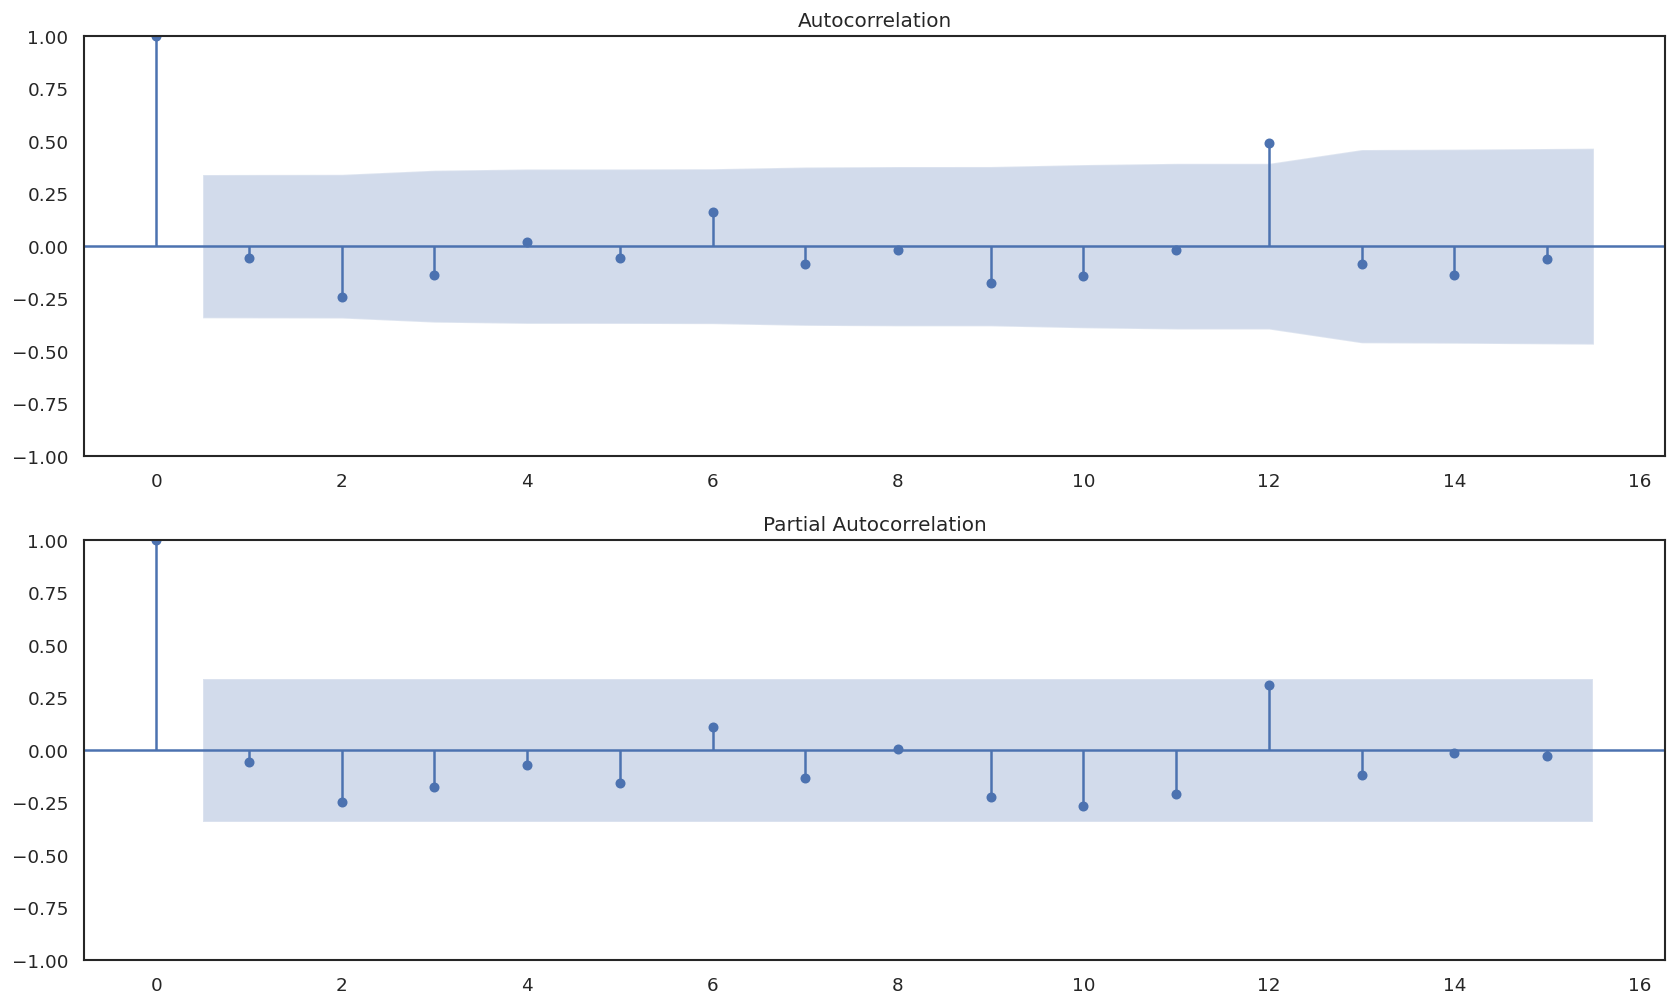

In [234]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def ACF_and_PACF(data):
  fig = plt.figure(figsize=(17,10))
  ax1 = fig.add_subplot(211)
  fig = plot_acf(data , lags = 15 , ax = ax1)
  ax2 = fig.add_subplot(212)
  fig = plot_pacf(data , lags = 15 , ax = ax2)

ACF_and_PACF(y['Weekly_Sales'])

**Observation**: It seems that AC and PAC are both moving quickly so we may need ARMA model¶

<h4><font  color='Red'>Finding order of d value through differencing</font> </h4>

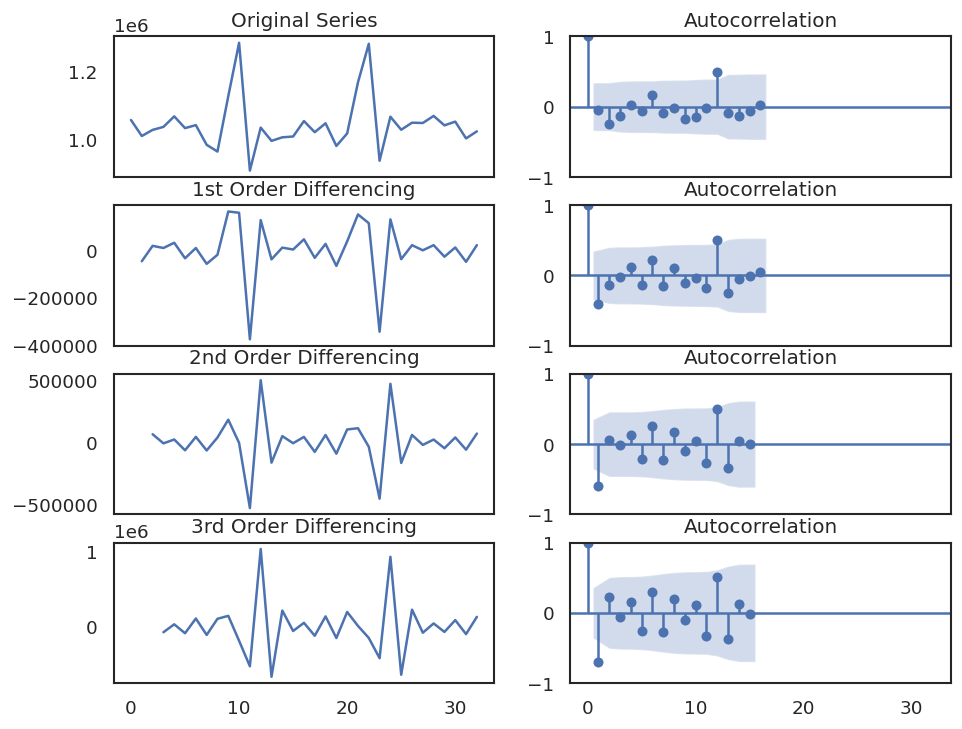

In [235]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(y['Weekly_Sales']); axes[0, 0].set_title('Original Series')
plot_acf(y['Weekly_Sales'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y['Weekly_Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y['Weekly_Sales'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y['Weekly_Sales'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y['Weekly_Sales'].diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y['Weekly_Sales'].diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y['Weekly_Sales'].diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

**Observation**: Data is not stationary in any , therefore d =0

[]

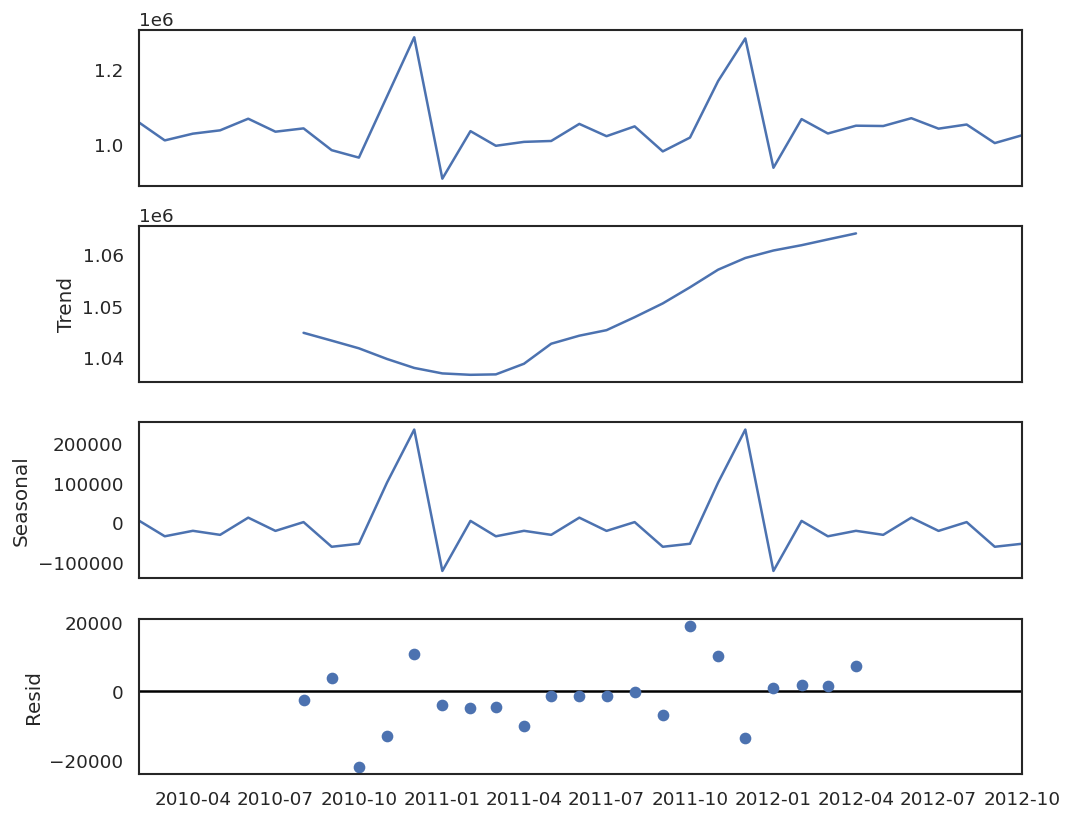

In [236]:
y= y.set_index('Date')
decomposition = sm.tsa.seasonal_decompose(y , model = "additive").plot()
plt.plot()

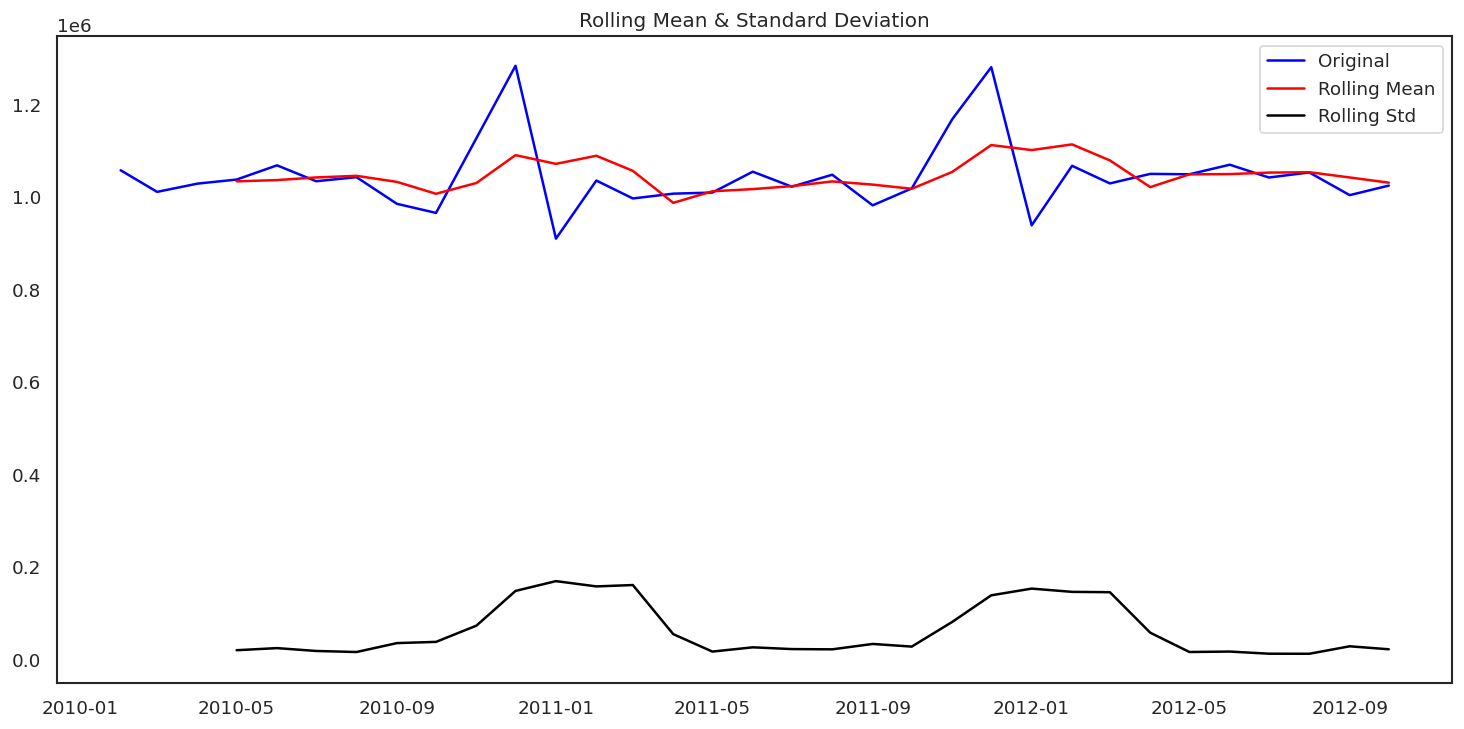

In [237]:
#Determine rolling statistics
plt.figure(figsize=(15,7))

rolmean = y.rolling(window=4).mean() #window size 4 denotes 4 months
rolstd = y.rolling(window=4).std()
#Plot rolling statistics
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

<h4><font  color='Red'>Finding order of p value through PAC</font> </h4>

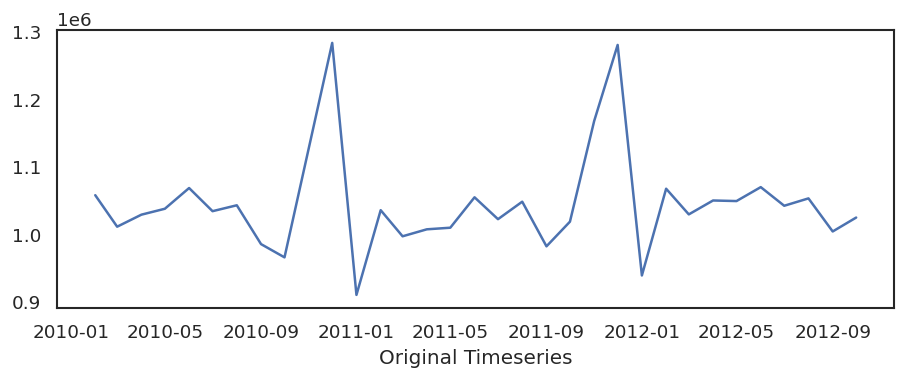

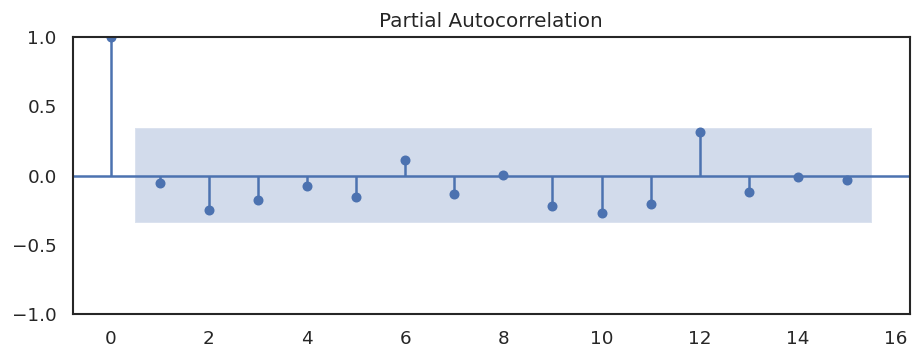

In [238]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(y['Weekly_Sales'])
plt.xlabel('Original Timeseries')
plot_pacf(y['Weekly_Sales'].dropna(),lags= 15)

plt.show()

**Observation**: We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1

<h4><font  color='Red'>Finding q value through AC</font> </h4>

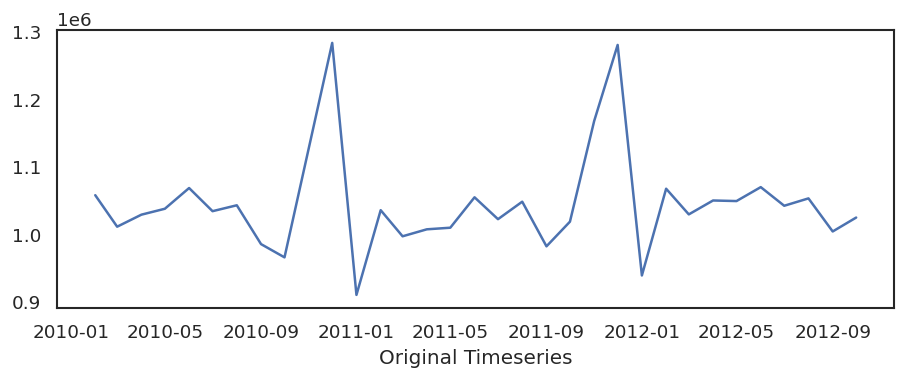

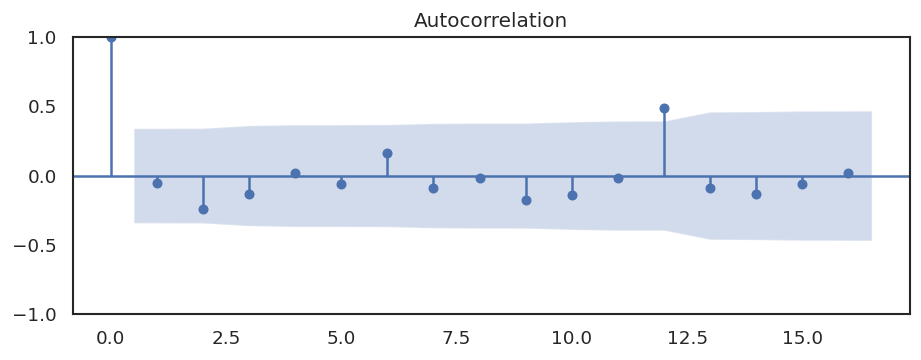

In [239]:
plt.plot(y['Weekly_Sales']); 
plt.xlabel('Original Timeseries')
plot_acf(y['Weekly_Sales'])

plt.show()

**Observation**: We can see that one of lags is well above the significance line so q is 1

<h3><font  color='Red'>Auto ARIMA</font> </h3>

In [240]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [241]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(y['Weekly_Sales'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=841.055, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=838.817, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=838.430, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=838.882, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=836.835, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.289 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -417.417
Date:                Wed, 06 Sep 2023   AIC                            836.835
Time:                        10:02:34   BIC                            838.300
Sample:                    02-01-2010   HQIC                           837.320
                         - 10-01-2012                                         
Co

**Observation**: P-value is 0 which is <0.05

In [242]:
y['Weekly_Sales'][:-10]

Date
2010-02-01    1.057405e+06
2010-03-01    1.010666e+06
2010-04-01    1.028499e+06
2010-05-01    1.037283e+06
2010-06-01    1.068034e+06
2010-07-01    1.033689e+06
2010-08-01    1.042445e+06
2010-09-01    9.848216e+05
2010-10-01    9.651637e+05
2010-11-01    1.126963e+06
2010-12-01    1.283380e+06
2011-01-01    9.094665e+05
2011-02-01    1.035174e+06
2011-03-01    9.964247e+05
2011-04-01    1.006784e+06
2011-05-01    1.009156e+06
2011-06-01    1.054297e+06
2011-07-01    1.021828e+06
2011-08-01    1.047774e+06
2011-09-01    9.815455e+05
2011-10-01    1.018118e+06
2011-11-01    1.167569e+06
2011-12-01    1.280347e+06
Name: Weekly_Sales, dtype: float64

In [243]:
y['Weekly_Sales'][-10:]

Date
2012-01-01    9.383026e+05
2012-02-01    1.067020e+06
2012-03-01    1.028932e+06
2012-04-01    1.049561e+06
2012-05-01    1.048703e+06
2012-06-01    1.069379e+06
2012-07-01    1.041719e+06
2012-08-01    1.052670e+06
2012-09-01    1.003586e+06
2012-10-01    1.024232e+06
Name: Weekly_Sales, dtype: float64

In [244]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = y['Weekly_Sales'][:-10]
test = y['Weekly_Sales'][-10:]

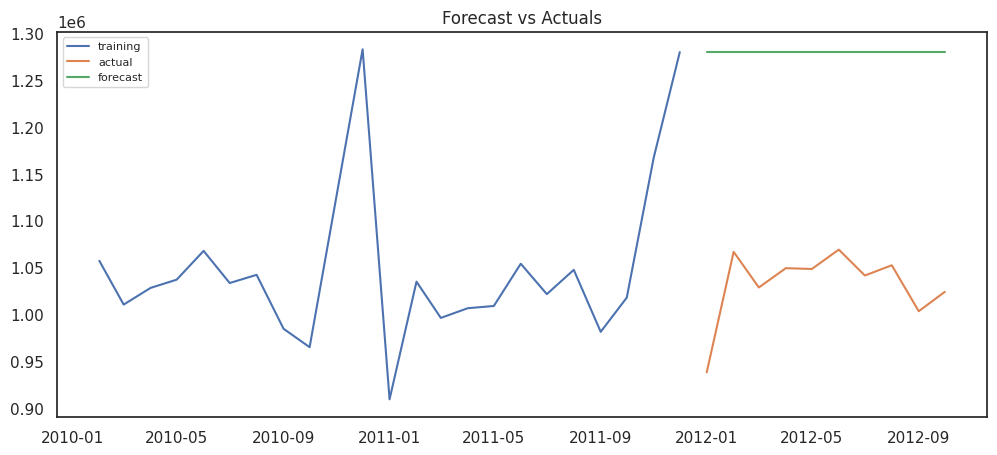

In [245]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(0,1,0))  
fitted = model.fit()  

# Forecast
fc= fitted.forecast(steps=10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()



**Observation**: This model's forecasting are the worst compared to the other models that i have tried

**Conclusion**: The second method which applied ARIMA , has the best results